<p style="background-color:#2384ad;color:black;font-size:25px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #01090d;">ANTHROPOGENIC AIR PREDICATION USING MACHINE LEARNING</p>


<p style="background-color:#2384ad;color:white;font-size:20px;text-align:center;border-radius:30px 60px;font-weight:bold;border:3px solid #01090d;">Importing Libraries</p>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<p style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:3px solid #01090d;padding:0px 20px">Importing Data</p>

In [64]:
df=pd.read_csv("F:\\Imarticus online PGA22\\Imarticus project\\project_dataset\\data.csv",encoding="ISO-8859-1")
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">Basic EDA</span>

In [65]:
df.shape

(435742, 13)

In [66]:
df.dtypes

stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [68]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [69]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [70]:
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [71]:
df['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

In [72]:
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [73]:
df['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">Visualizing the Data</span>

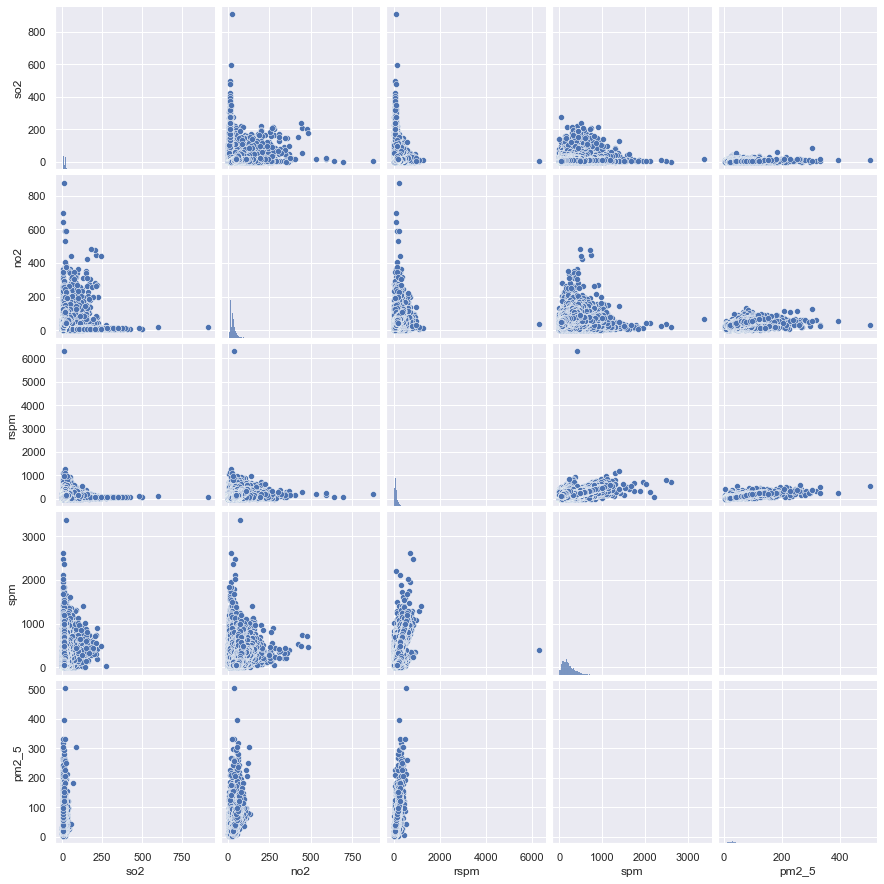

In [74]:
sns.pairplot(data=df)

[]

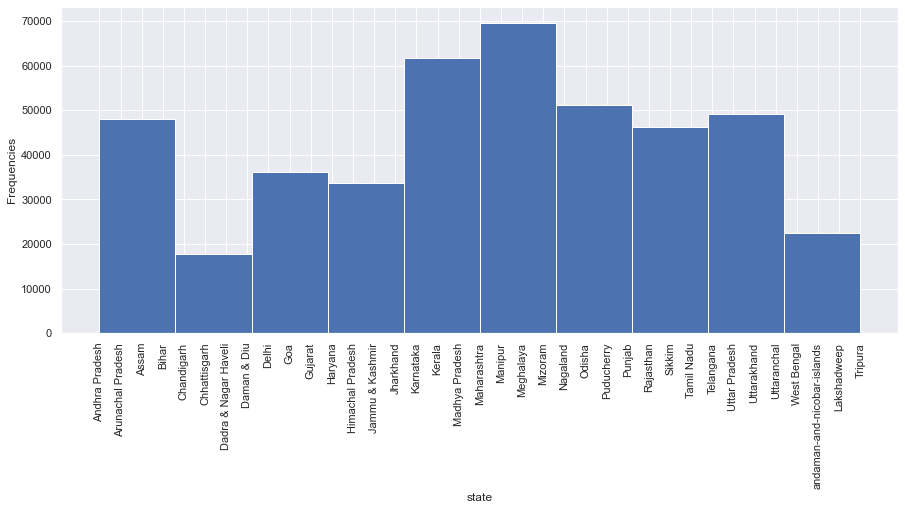

In [75]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()

[]

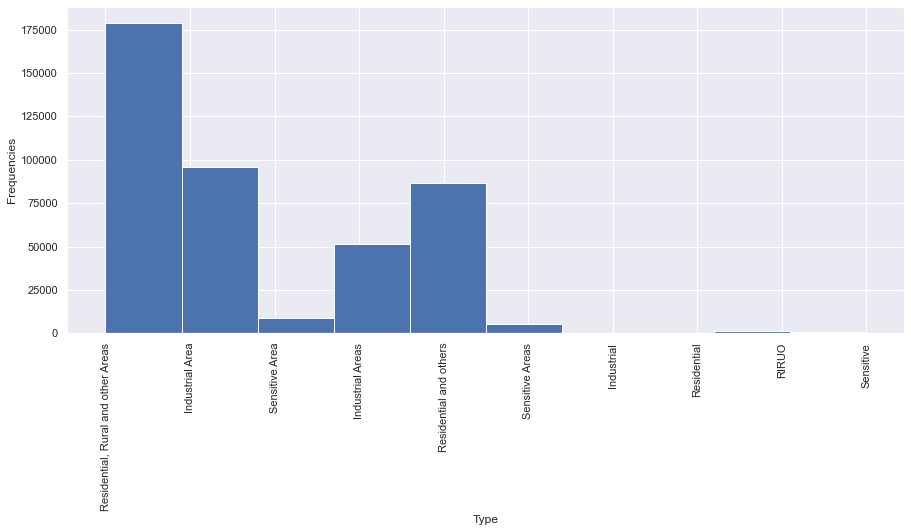

In [76]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()

[]

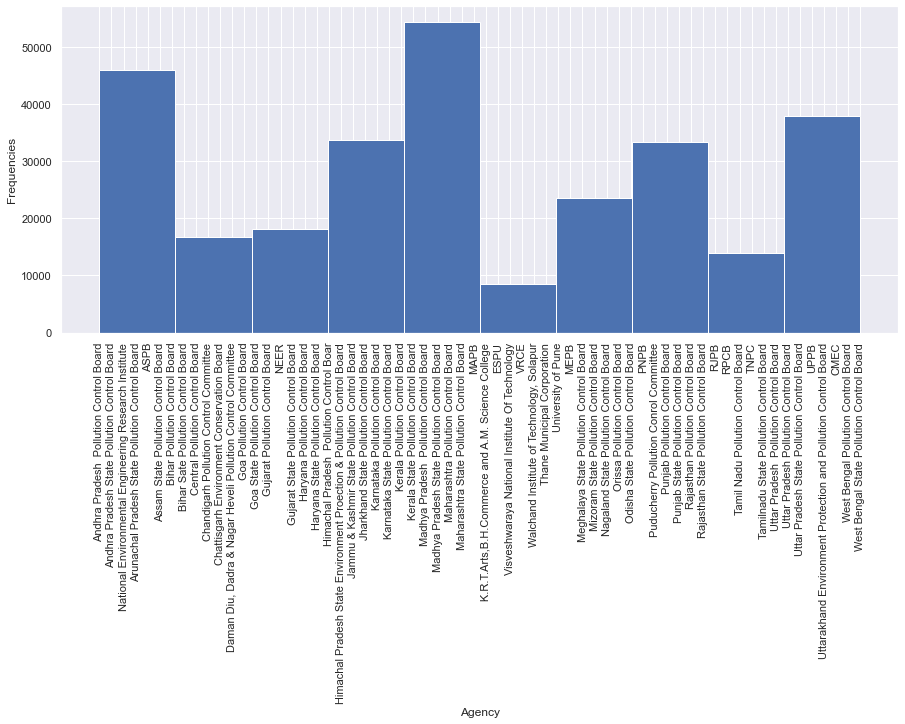

In [77]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()

<AxesSubplot:xlabel='state', ylabel='so2'>

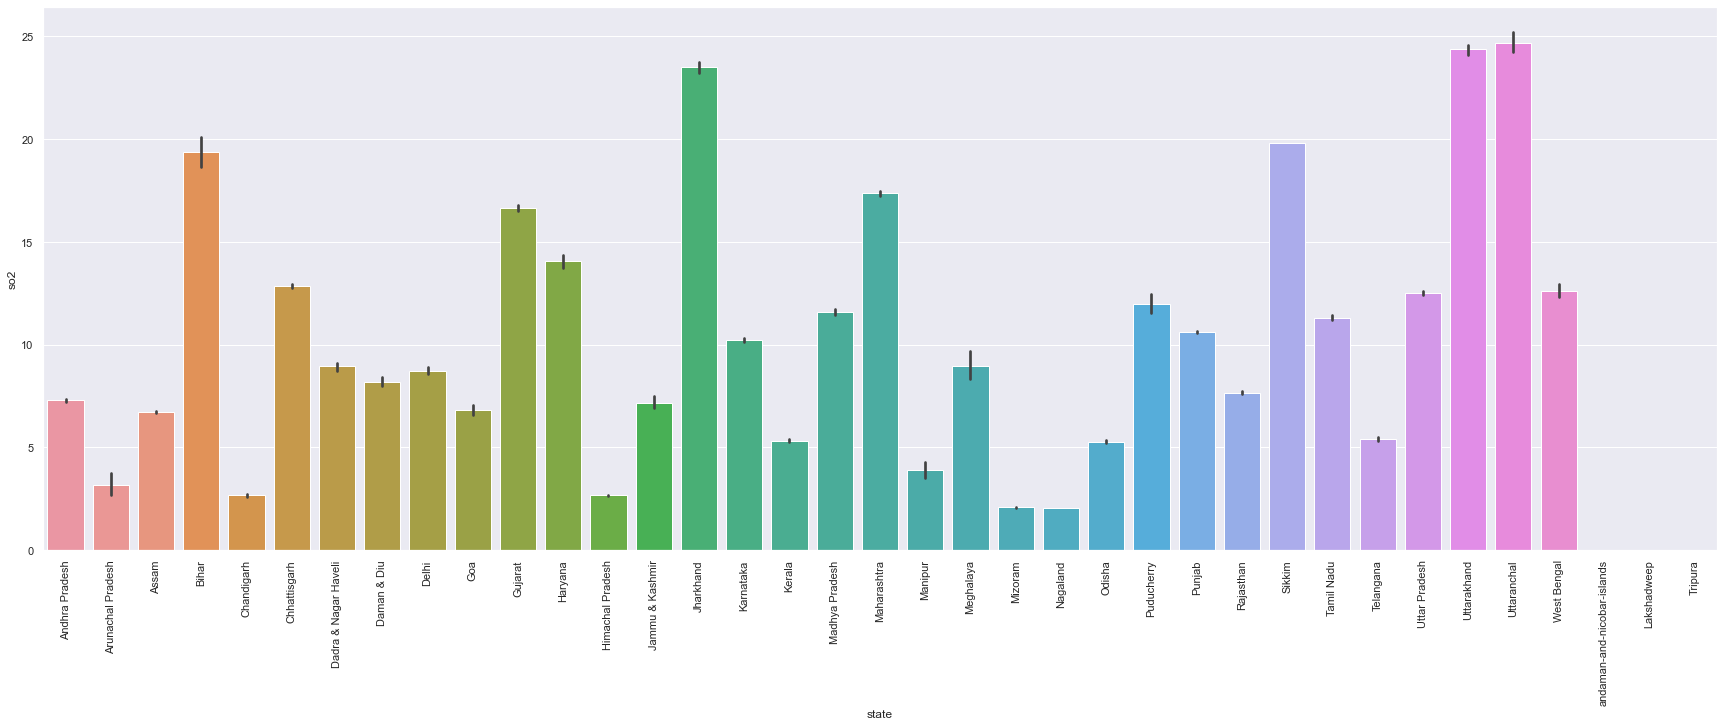

In [78]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df)

In [79]:
plt.rcParams['figure.figsize']=(30,10)

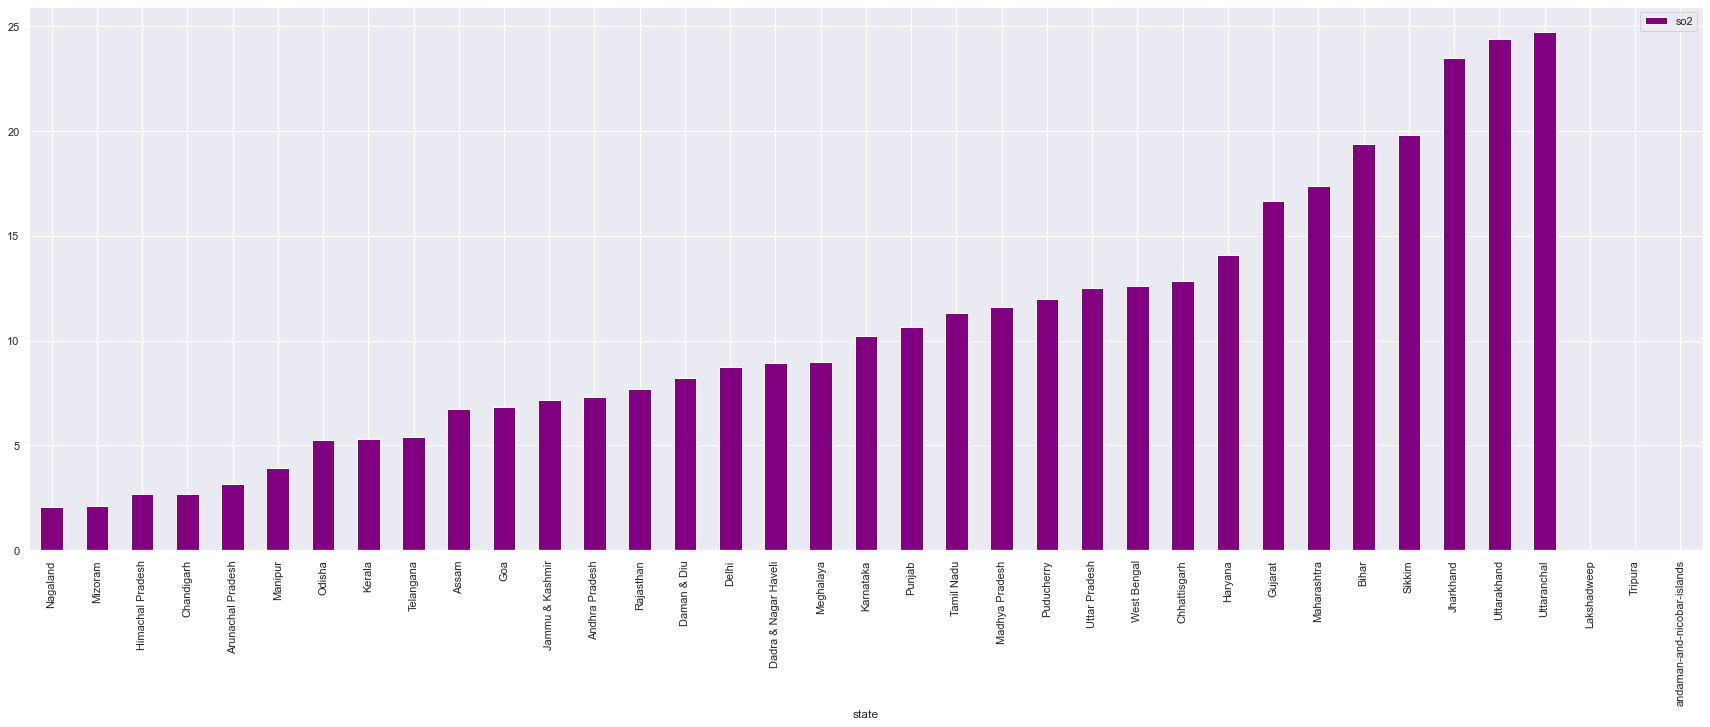

In [80]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()

<AxesSubplot:xlabel='state', ylabel='no2'>

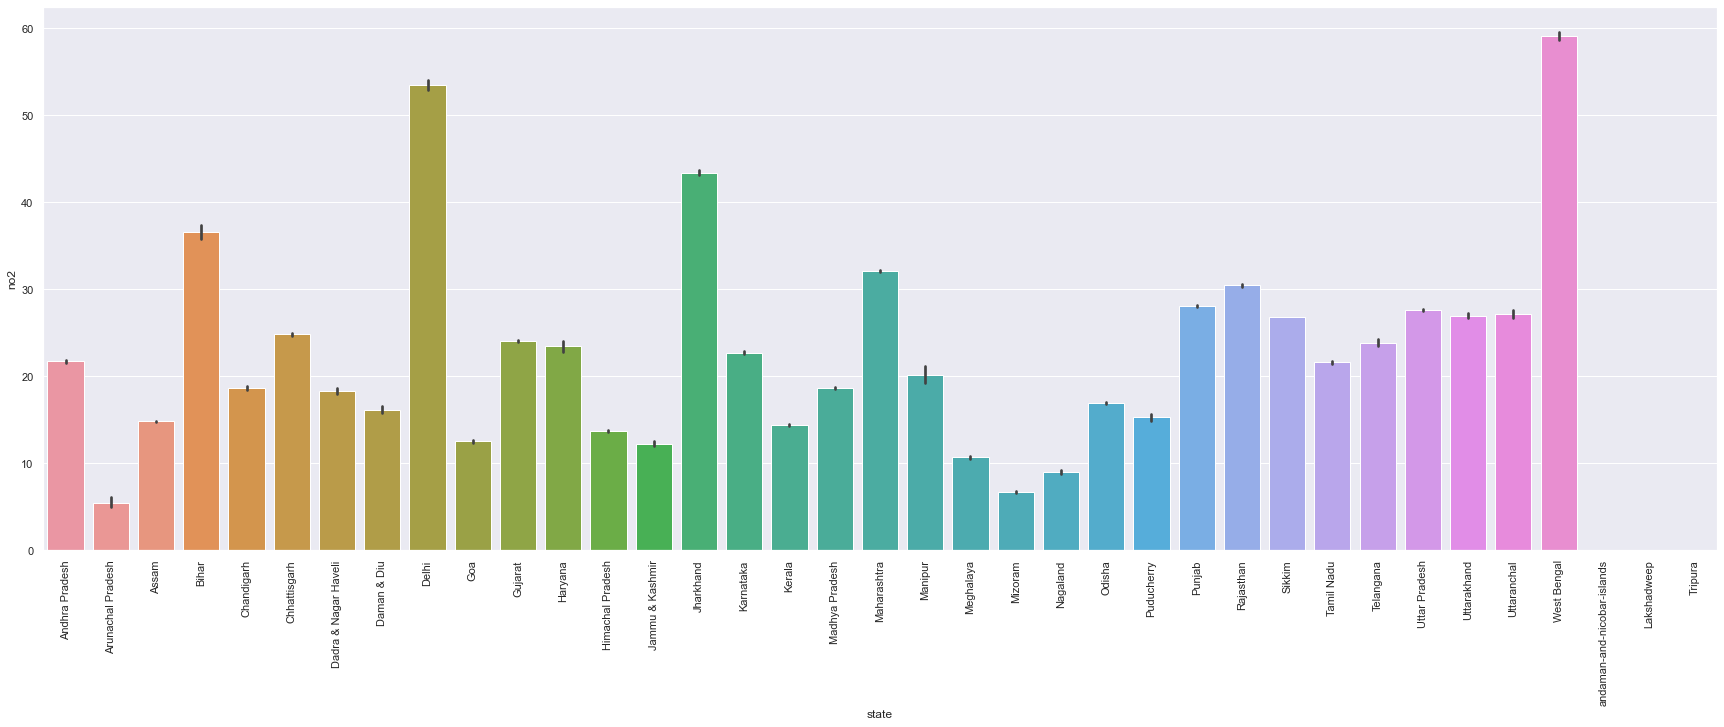

In [81]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df)

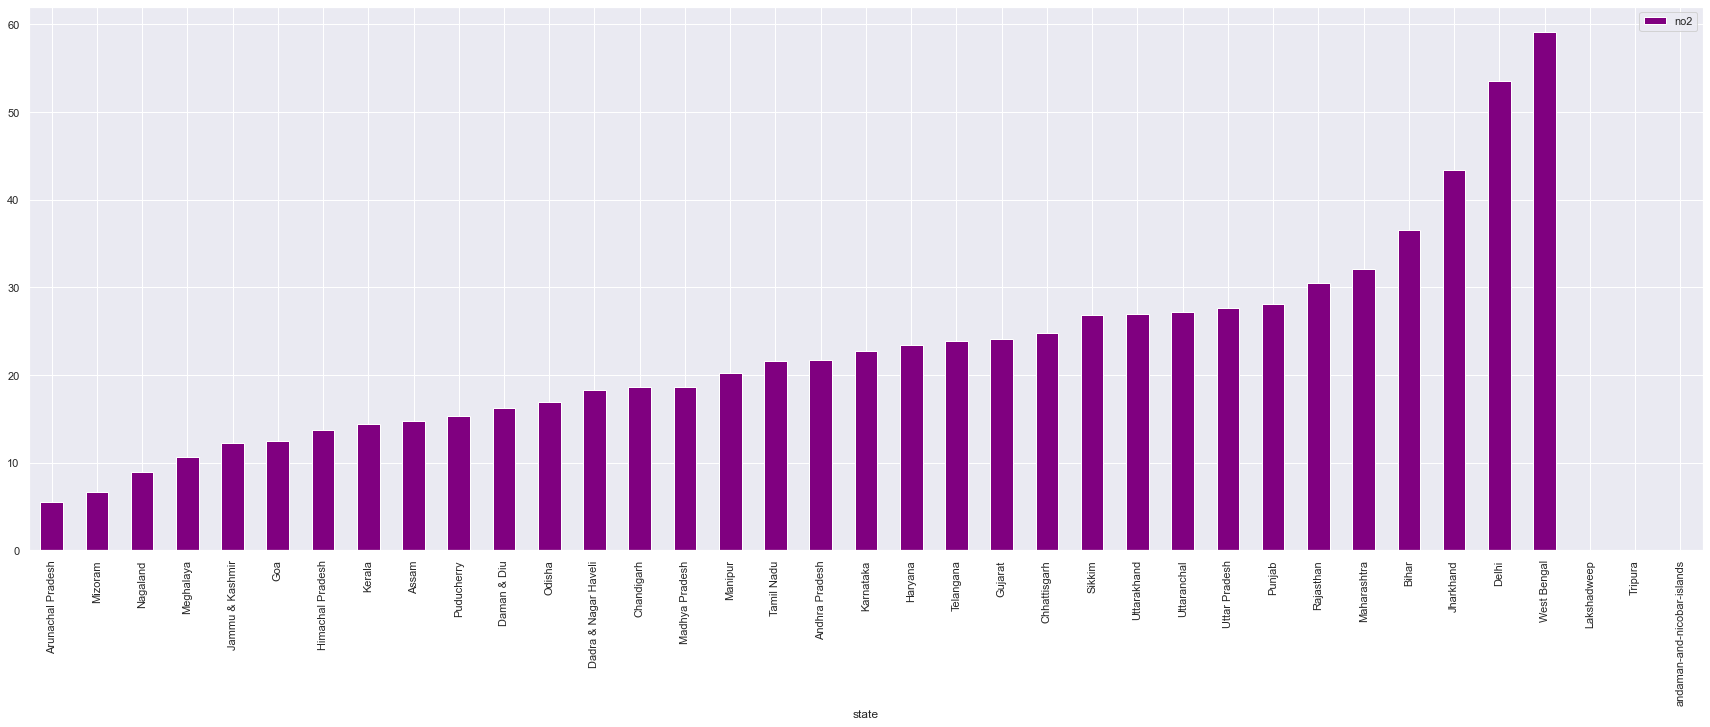

In [82]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()

<AxesSubplot:xlabel='state', ylabel='rspm'>

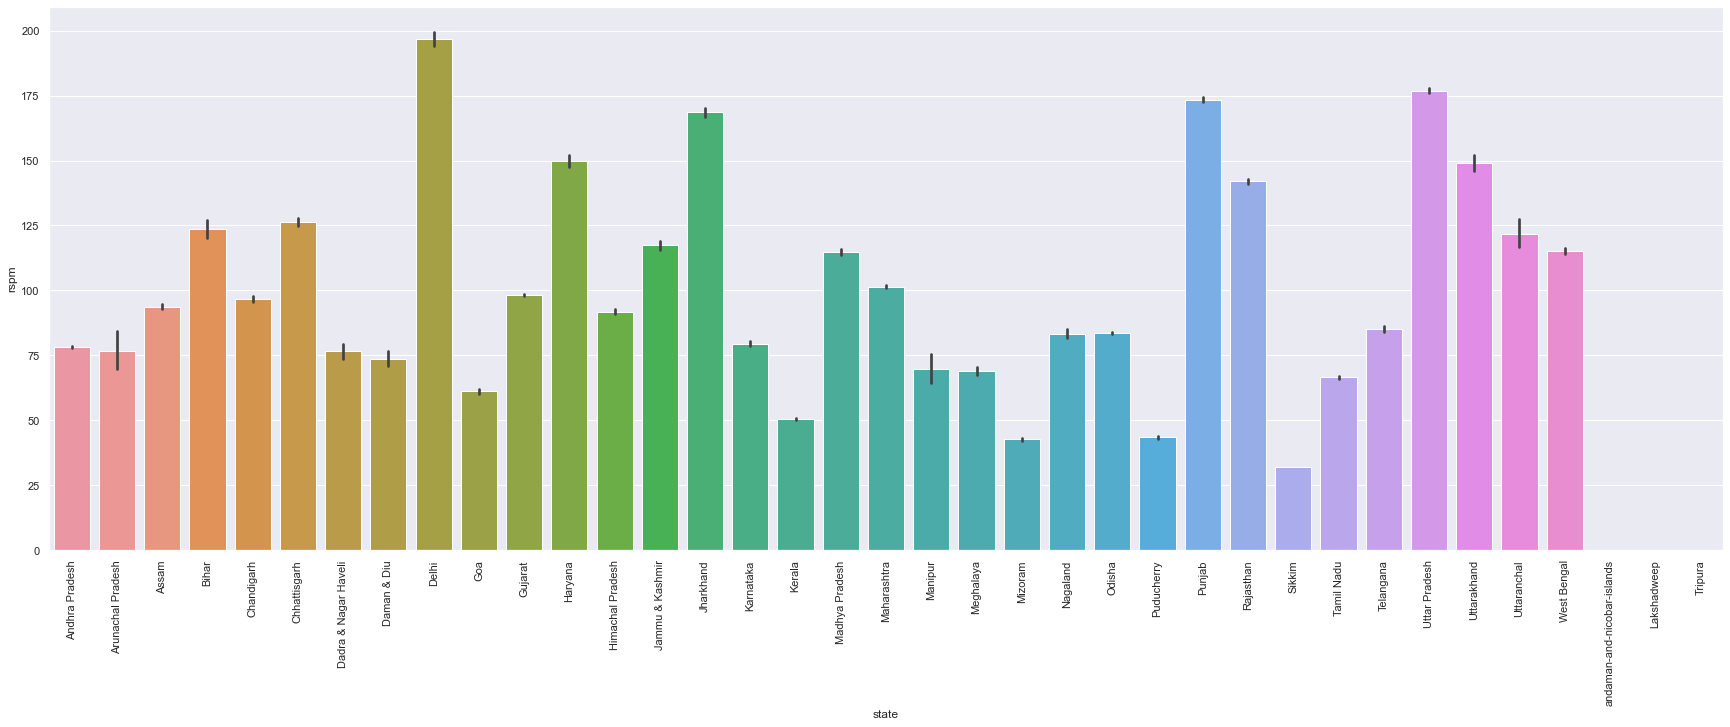

In [83]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df)

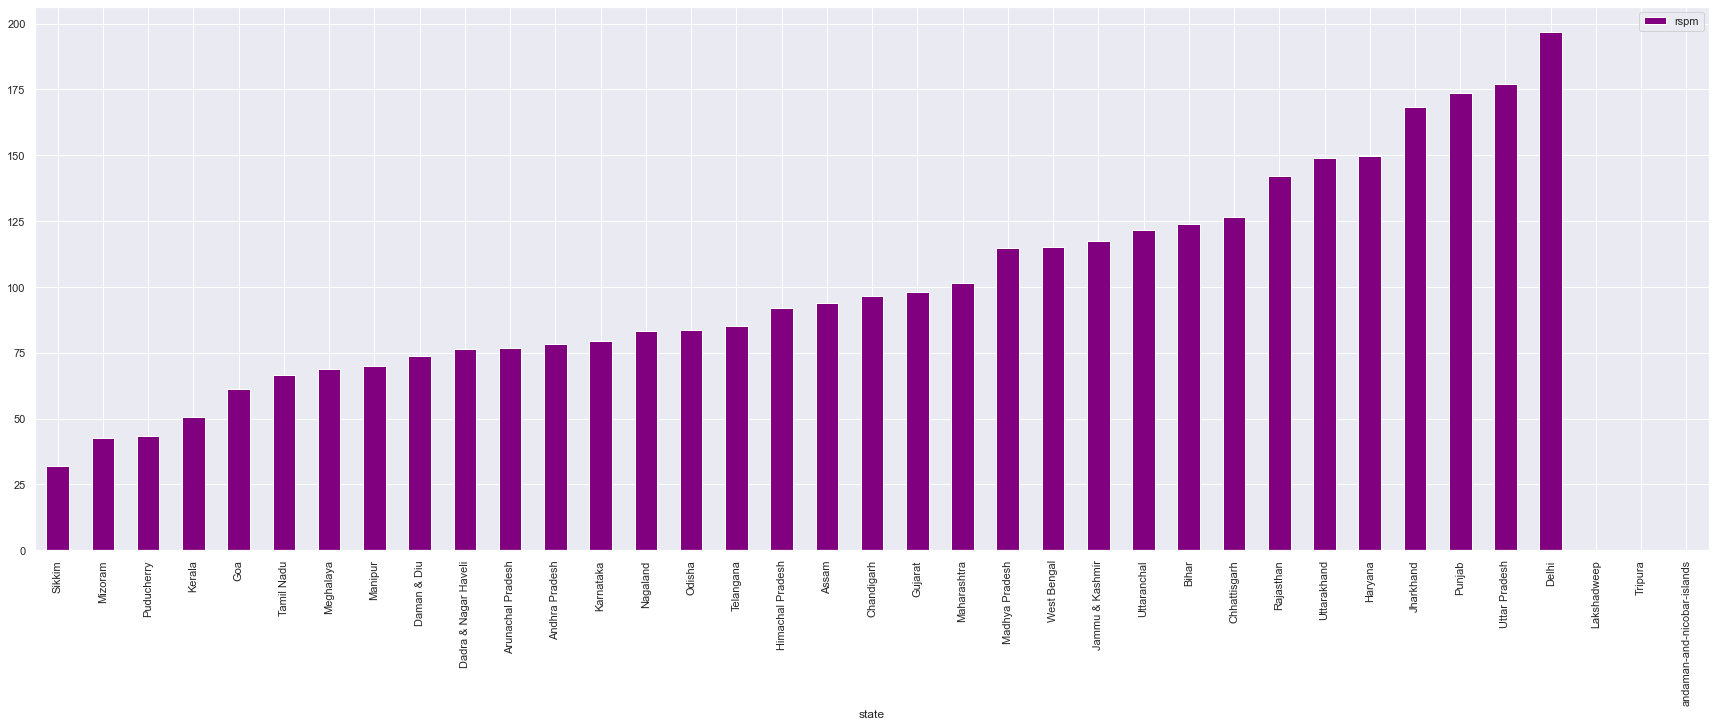

In [84]:
df[['rspm','state']].groupby(["state"]).mean().sort_values(by='rspm').plot.bar(color='purple')
plt.show()

<AxesSubplot:xlabel='state', ylabel='spm'>

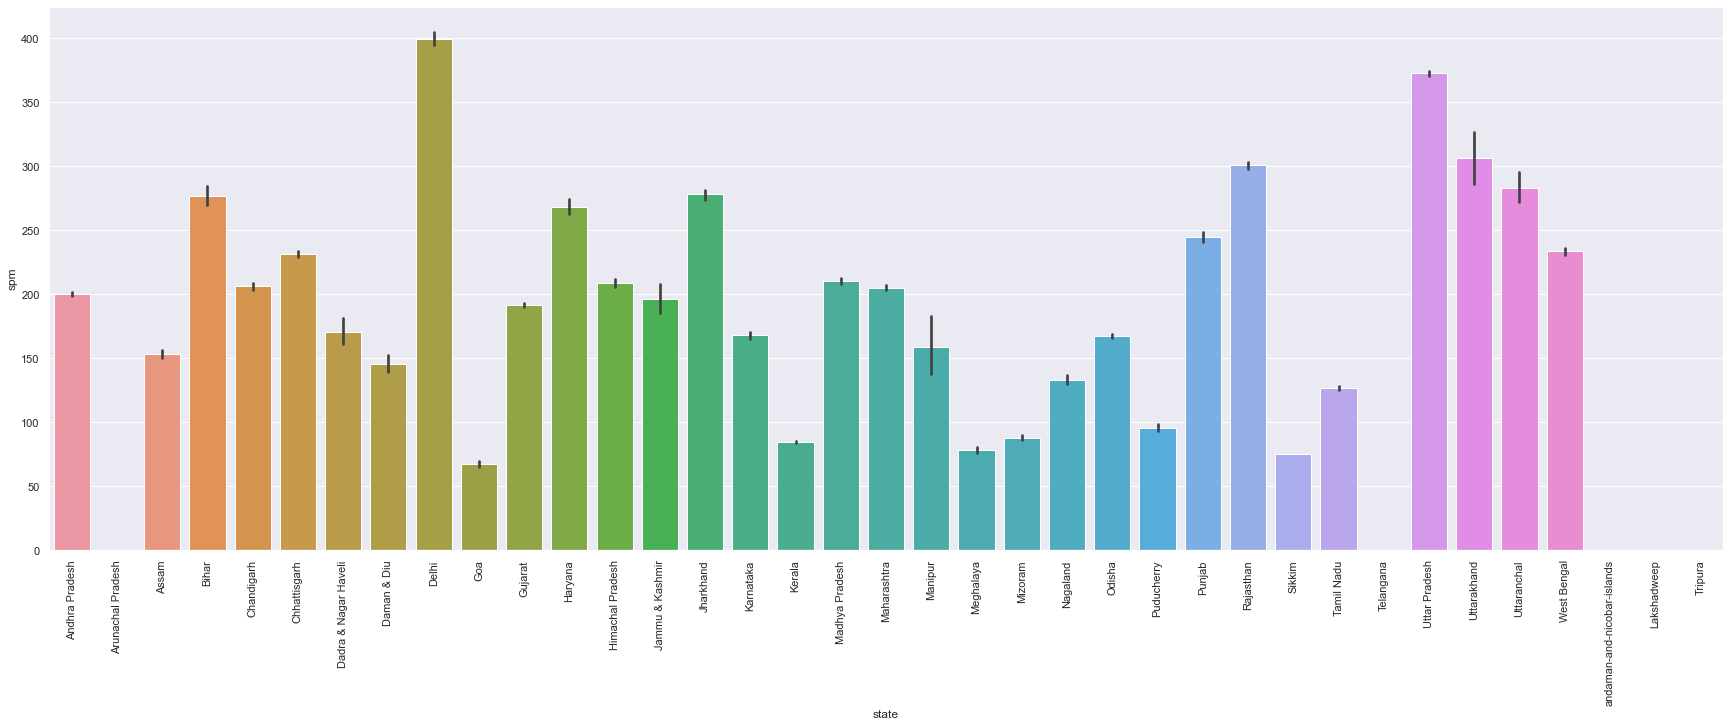

In [85]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df)

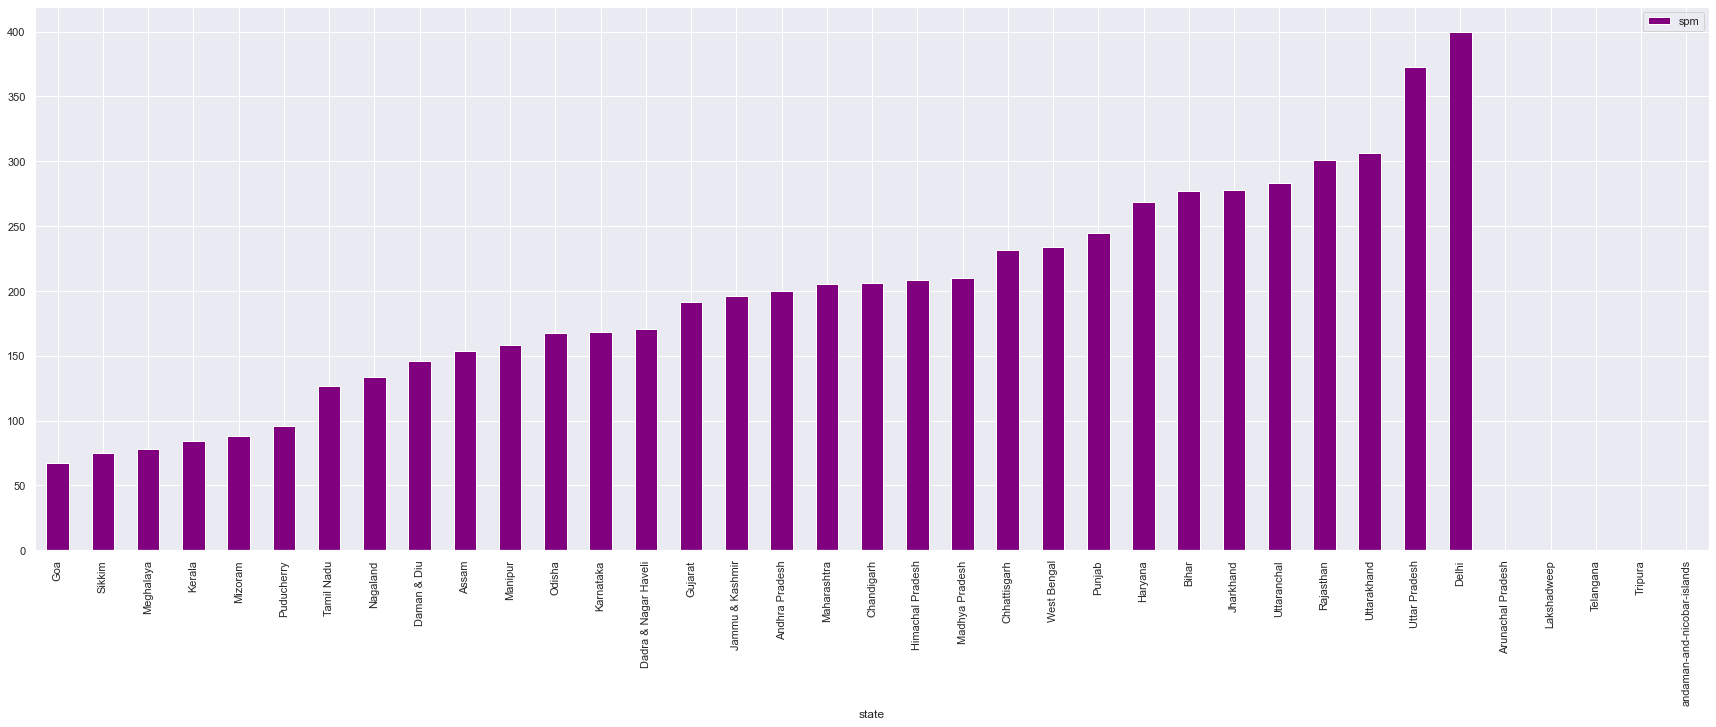

In [86]:
df[['spm','state']].groupby(["state"]).mean().sort_values(by='spm').plot.bar(color='purple')
plt.show()

<AxesSubplot:xlabel='state', ylabel='pm2_5'>

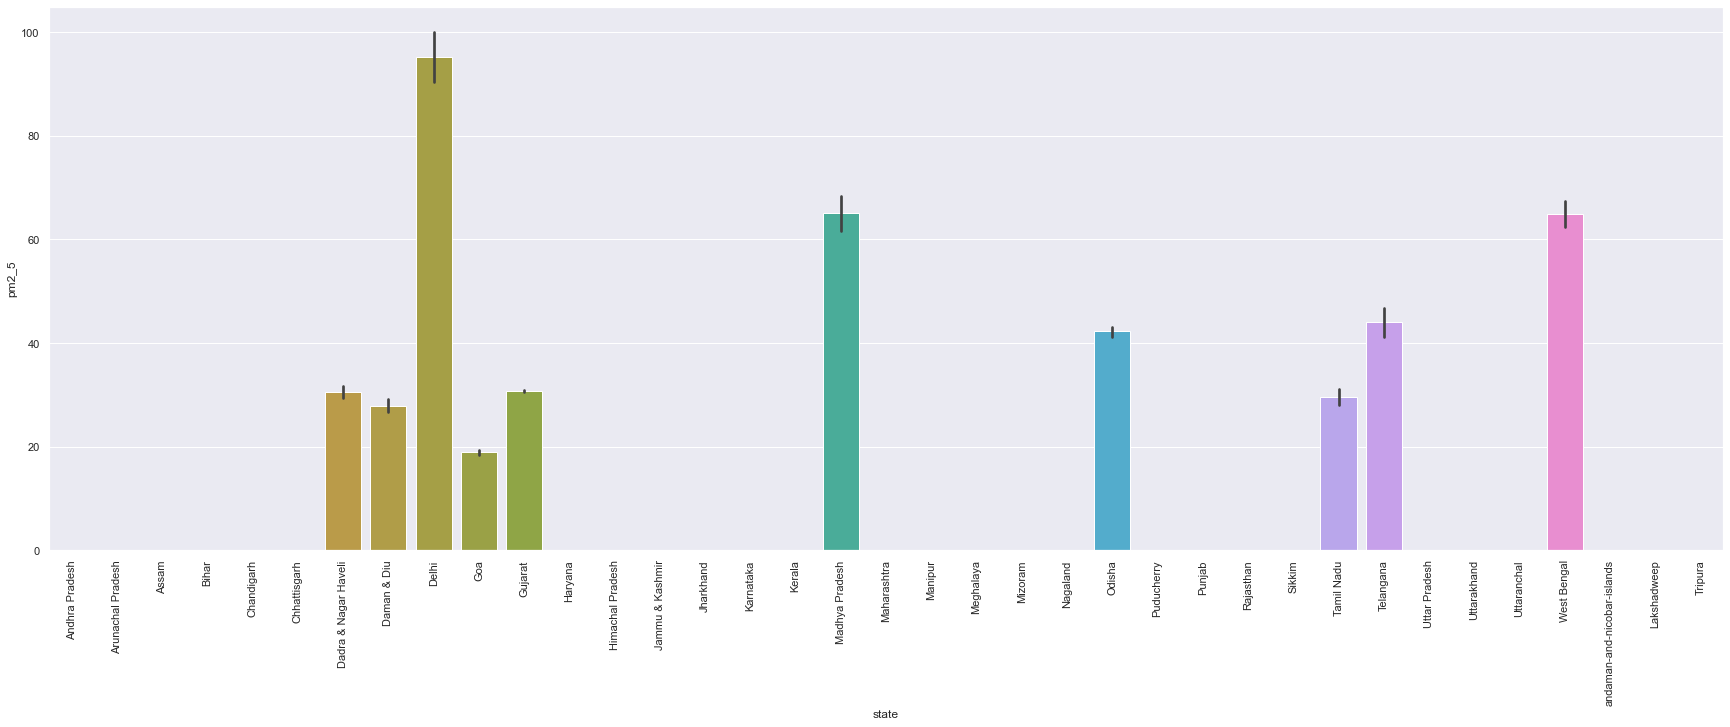

In [87]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df)

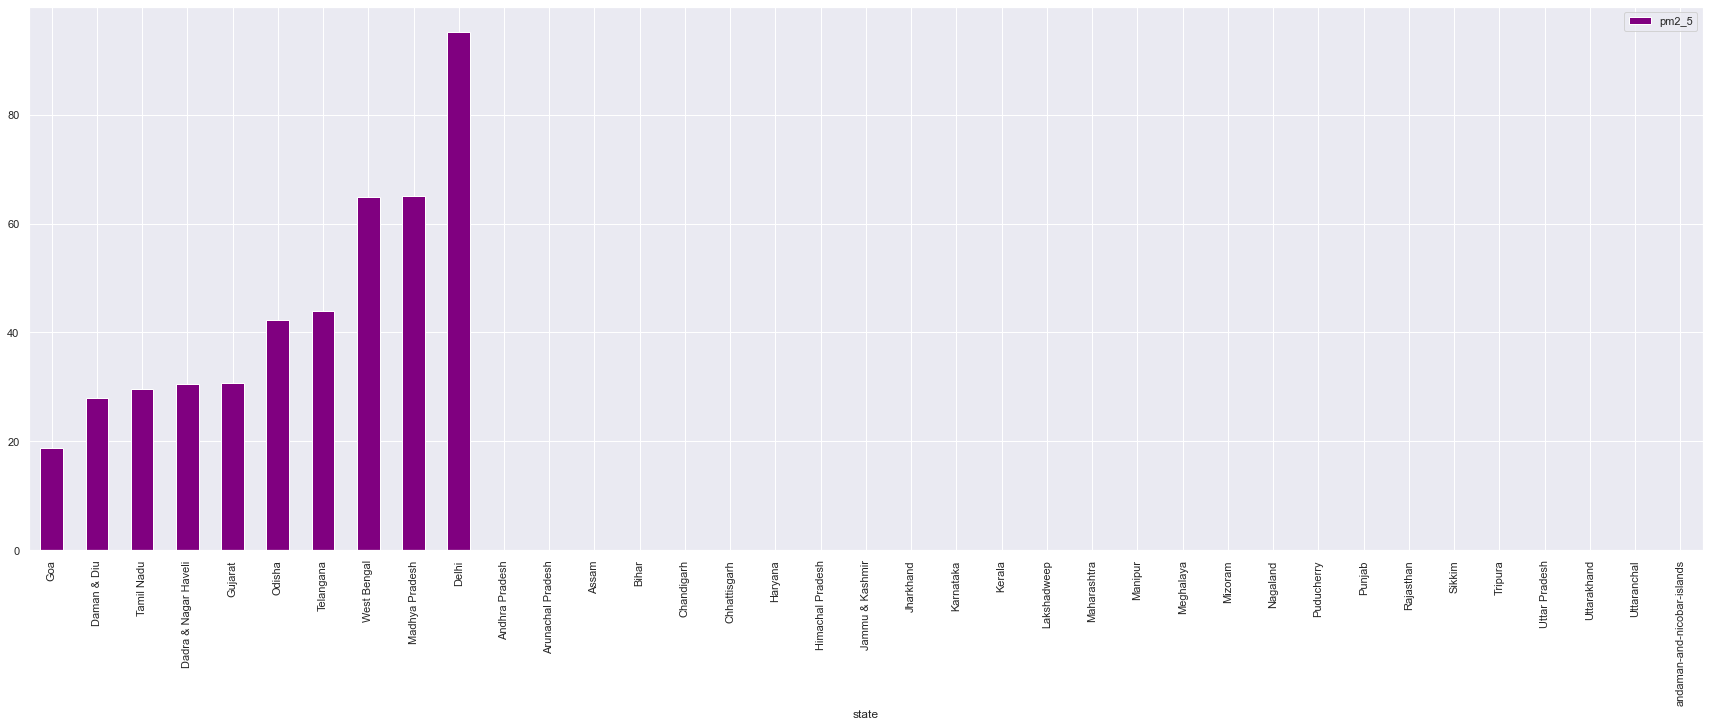

In [88]:
df[['pm2_5','state']].groupby(["state"]).mean().sort_values(by='pm2_5').plot.bar(color='purple')
plt.show()

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">checking null values</span>

In [89]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

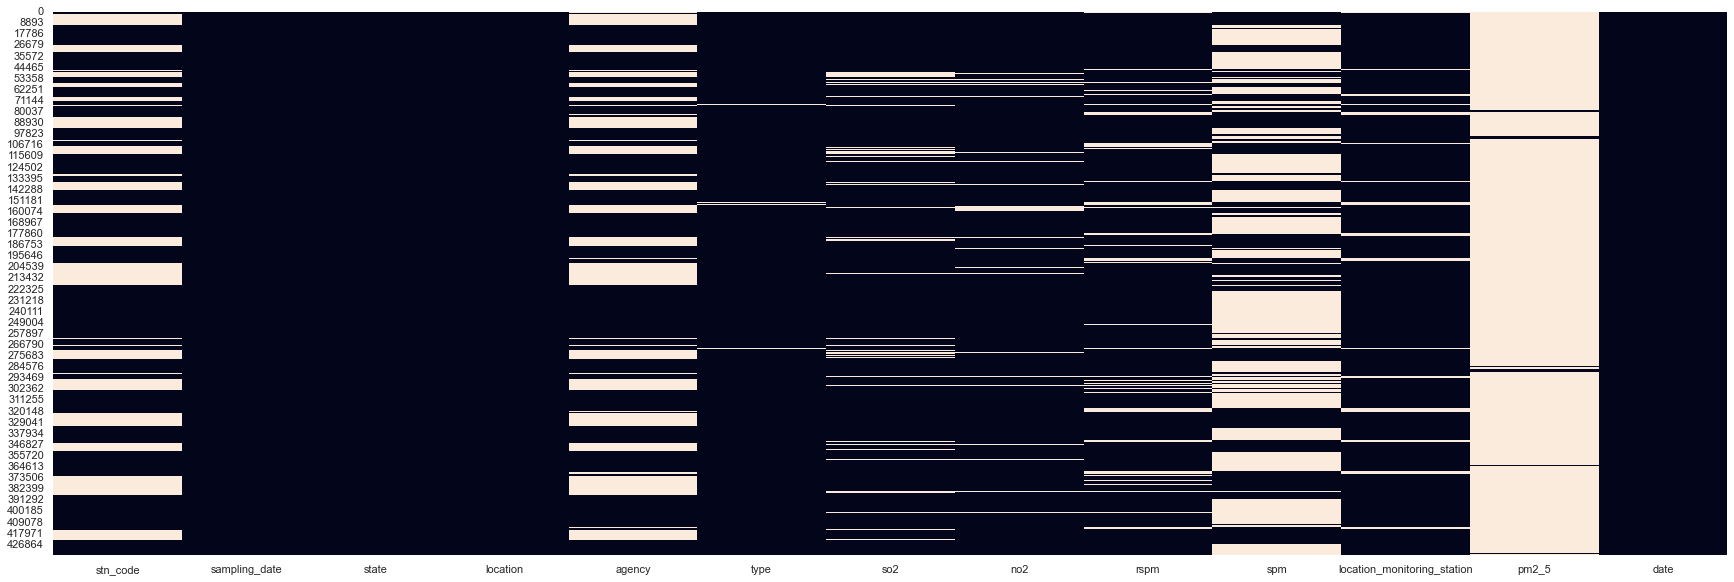

In [90]:
# plot heatmap to check null values
# "cbar = False" does not show the color axis 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

In [91]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [92]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
missing_data_with_percentage

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">Dropping Null Columns</span>

In [93]:
df.drop(['agency'],axis=1,inplace=True) 
df.drop(['stn_code'],axis=1,inplace=True)
#df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [94]:
df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
date             7
dtype: int64

In [95]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">Filling the NAN value for the features</span>

In [96]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [98]:
df.fillna(0, inplace=True)

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">Checking once again null value after filling nan value</span>

In [99]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
dtype: int64

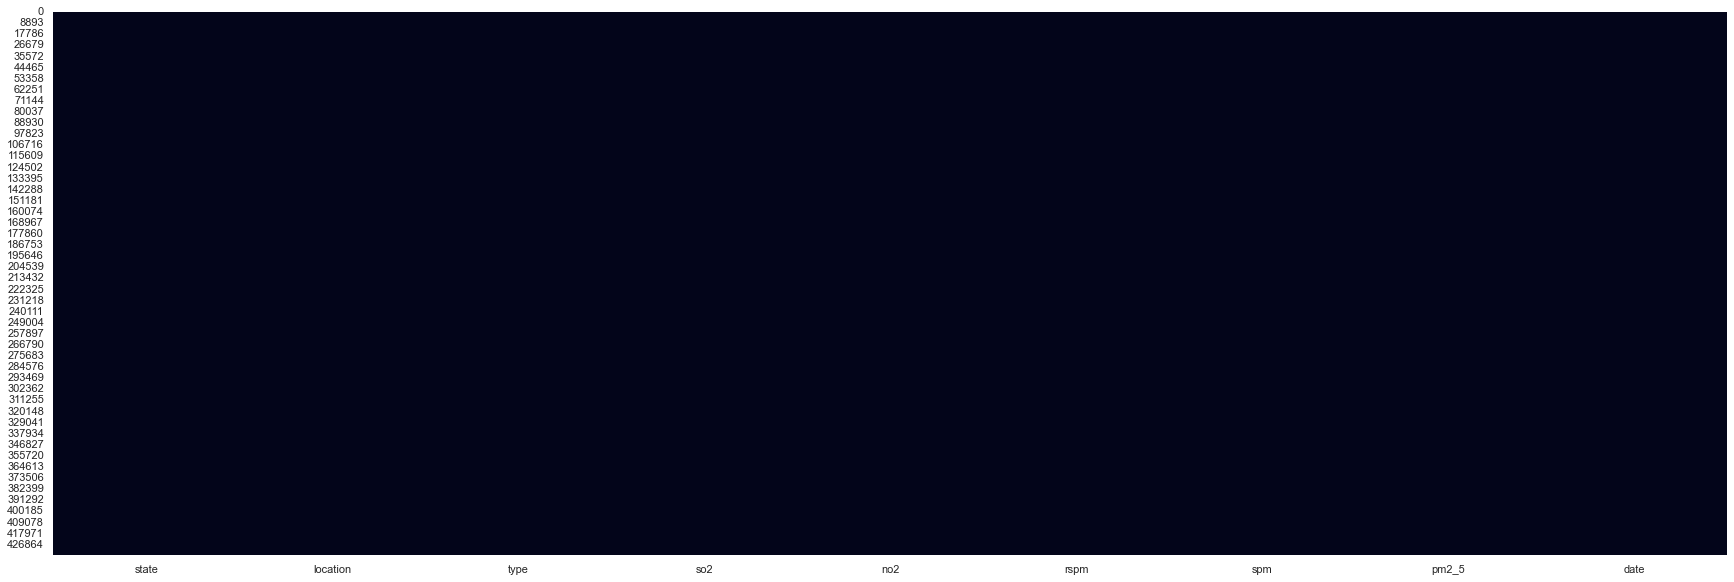

In [100]:
#plotting heatmap after treatment
sns.heatmap(df.isnull(), cbar=False)
# display the plot
plt.show()

In [101]:
df.tail()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0,2015-12-29
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0
435741,Tripura,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0


<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">Creating a new columns for the dependent features</span>

In [102]:
#CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA
#The air quality index is a piecewise linear function of the pollutant concentration. 
#At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. 
#To convert from concentration to AQI this equation is used

#Function to calculate so2 individual pollutant index(si)
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [105]:
#Function to calculate no2 individual pollutant index(ni)

def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [106]:
#Function to calculate rspm individual pollutant index(rpi)

def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [107]:
#Function to calculate spm individual pollutant index(spi)

def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [108]:
#Function to calculate the air quality index (AQI) of every data value

def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [109]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.tail()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0,2015-12-24,27.5,62.5,0.0,0.0,62.5,Moderate
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0,2015-12-29,25.0,57.5,0.0,0.0,57.5,Moderate
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,Good
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,Good
435741,Tripura,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,Good


In [110]:
df['AQI_Range'].head(20)

0         Good
1         Good
2         Good
3         Good
4         Good
5         Good
6         Good
7         Good
8         Good
9         Good
10        Good
11        Poor
12    Moderate
13        Poor
14        Poor
15        Poor
16    Moderate
17        Poor
18    Moderate
19    Moderate
Name: AQI_Range, dtype: object

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">After creating a dependent features again checking the features</span>

In [111]:
df.dtypes

state         object
location      object
type          object
so2          float64
no2          float64
rspm         float64
spm          float64
pm2_5        float64
date          object
SOi          float64
Noi          float64
Rpi          float64
SPMi         float64
AQI          float64
AQI_Range     object
dtype: object

In [112]:
df.describe()

,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI
count,435742.000000,435742.000000,435742.000000,435742.000000,435742.000000,435742.000000,435742.000000,435742.0,435742.000000,435742.000000
mean,9.968364,24.848119,98.786766,100.503296,0.871919,12.361707,30.941921,0.0,85.233420,101.773171
std,11.116635,18.801635,77.979702,150.074247,7.424595,12.433975,22.659701,0.0,120.703402,110.717619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,4.000000,13.000000,47.000000,0.000000,0.000000,5.000000,16.250000,0.0,0.000000,23.750000
50%,7.183333,21.000000,83.000000,0.000000,0.000000,8.979167,26.250000,0.0,0.000000,50.000000
75%,13.000000,32.000000,135.000000,172.000000,0.000000,16.250000,40.000000,0.0,148.000000,148.666667
max,909.000000,876.000000,6307.033333,3380.000000,504.000000,313.625000,796.666667,0.0,1086.046512,1086.046512


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   state      435742 non-null  object 
 1   location   435742 non-null  object 
 2   type       435742 non-null  object 
 3   so2        435742 non-null  float64
 4   no2        435742 non-null  float64
 5   rspm       435742 non-null  float64
 6   spm        435742 non-null  float64
 7   pm2_5      435742 non-null  float64
 8   date       435742 non-null  object 
 9   SOi        435742 non-null  float64
 10  Noi        435742 non-null  float64
 11  Rpi        435742 non-null  float64
 12  SPMi       435742 non-null  float64
 13  AQI        435742 non-null  float64
 14  AQI_Range  435742 non-null  object 
dtypes: float64(10), object(5)
memory usage: 49.9+ MB


In [114]:
df.nunique()

state          37
location      304
type           10
so2          4197
no2          6864
rspm         6065
spm          6668
pm2_5         434
date         5068
SOi          4197
Noi          6864
Rpi             1
SPMi         6668
AQI          9675
AQI_Range       6
dtype: int64

In [115]:
df['AQI_Range'].value_counts()

Good              219643
Poor               93272
Moderate           56571
Unhealthy          31733
Hazardous          18700
Very unhealthy     15823
Name: AQI_Range, dtype: int64

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">Before outlier Distribution of variables</span>

count    435742.000000
mean        101.773171
std         110.717619
min           0.000000
25%          23.750000
50%          50.000000
75%         148.666667
max        1086.046512
Name: AQI, dtype: float64


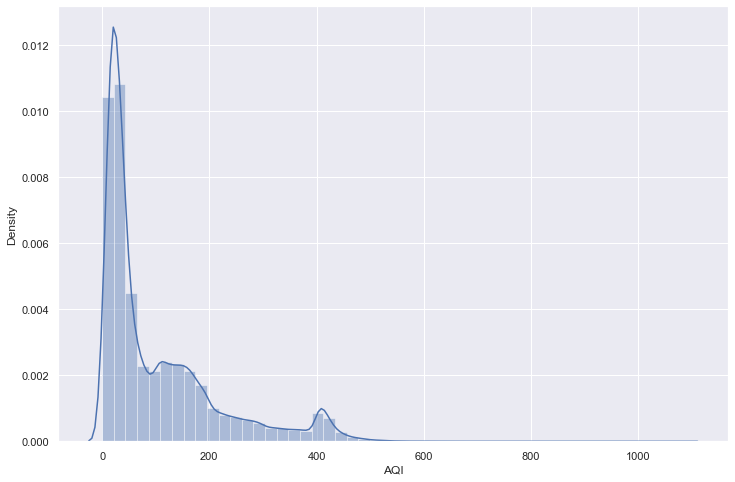

In [116]:
print(df.AQI.describe())
sns.set(rc={"figure.figsize": (12, 8)})

ax = sns.distplot(df["AQI"])

# display the plot
plt.show()

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">checking outliers</span>

<AxesSubplot:>

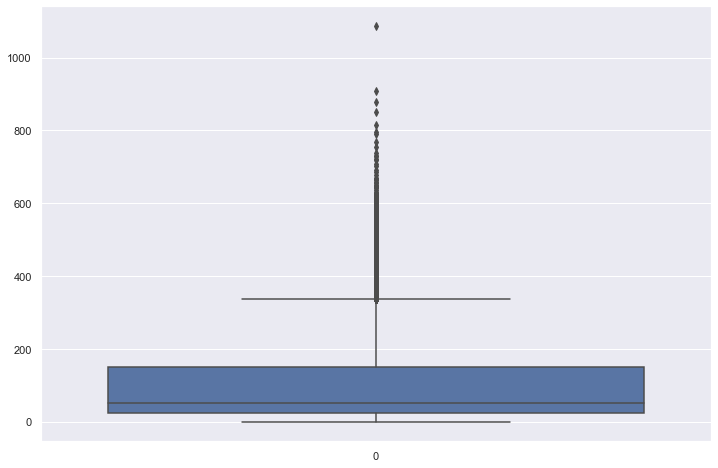

In [117]:
sns.boxplot( data=df["AQI"])

In [118]:
df.drop(df[df["AQI"] >= 410].index, inplace=True)


In [119]:
df["AQI"].shape

(422630,)

<AxesSubplot:>

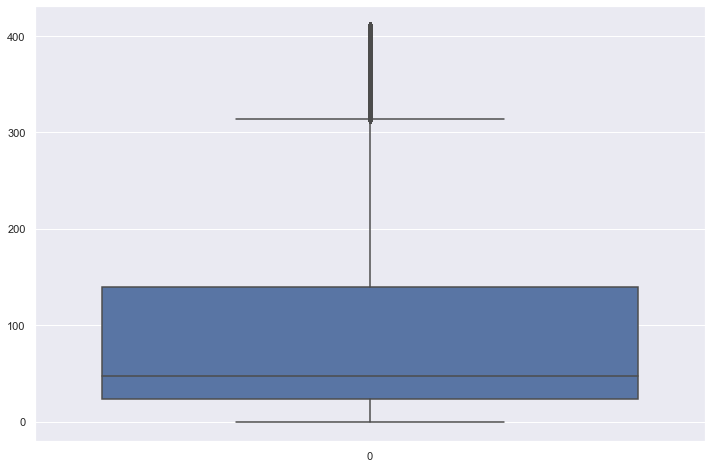

In [120]:
sns.boxplot( data=df["AQI"])

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">After checking outlier distribution of variables</span>

count    422630.000000
mean         91.312907
std          94.695083
min           0.000000
25%          23.300000
50%          47.000000
75%         139.333333
max         409.934884
Name: AQI, dtype: float64


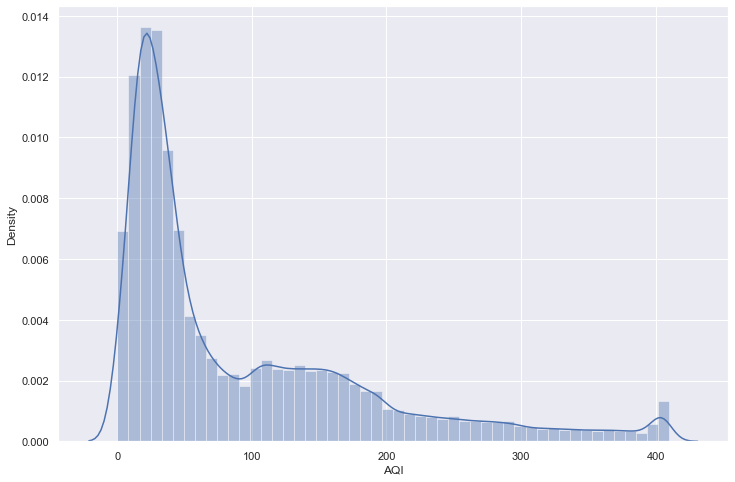

In [121]:
print(df.AQI.describe())
sns.set(rc={"figure.figsize": (12, 8)})

ax = sns.distplot(df["AQI"])

# display the plot
plt.show()

count    422630.000000
mean         12.215844
std          12.237177
min           0.000000
25%           5.000000
50%           8.750000
75%          16.250000
max         313.625000
Name: SOi, dtype: float64
count    422630.000000
mean         30.373734
std          21.945570
min           0.000000
25%          16.250000
50%          26.250000
75%          38.875000
max         402.500000
Name: Noi, dtype: float64
count    422630.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Rpi, dtype: float64
count    422630.000000
mean         74.269916
std         104.827693
min           0.000000
25%           0.000000
50%           0.000000
75%         138.000000
max         409.934884
Name: SPMi, dtype: float64


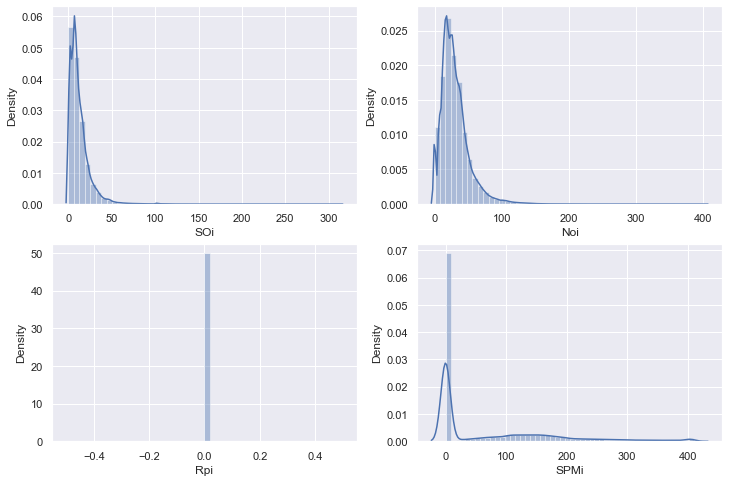

In [122]:
print(df.SOi.describe())
print(df.Noi.describe())
print(df.Rpi.describe())
print(df.SPMi.describe())

plt.subplot(2,2,1)
sns.distplot(df["SOi"])

plt.subplot(2,2,2)
sns.distplot(df["Noi"])

plt.subplot(2,2,3)
sns.distplot(df["Rpi"])

plt.subplot(2,2,4)
sns.distplot(df["SPMi"])

# display the plot
plt.show()

In [123]:
#drop the Rpi features because it has full of Nan values
df.drop(['Rpi'],axis=1,inplace=True)

In [124]:
# use the corr() function to generate the correlation matrix of the numeric variables
df_corr = df.corr()

# print the correlation matrix
df_corr

,so2,no2,rspm,spm,pm2_5,SOi,Noi,SPMi,AQI
so2,1.000000,0.371320,0.105741,0.087555,-0.019182,0.969242,0.375209,0.084535,0.156815
no2,0.371320,1.000000,0.307702,0.141645,0.022276,0.408199,0.998558,0.138056,0.277323
rspm,0.105741,0.307702,1.000000,0.052797,0.040928,0.119750,0.313100,0.046994,0.132085
spm,0.087555,0.141645,0.052797,1.000000,-0.083737,0.098948,0.144715,0.998033,0.978902
pm2_5,-0.019182,0.022276,0.040928,-0.083737,1.000000,-0.020549,0.023224,-0.084502,-0.071428
SOi,0.969242,0.408199,0.119750,0.098948,-0.020549,1.000000,0.413269,0.095562,0.167753
Noi,0.375209,0.998558,0.313100,0.144715,0.023224,0.413269,1.000000,0.141008,0.279838
SPMi,0.084535,0.138056,0.046994,0.998033,-0.084502,0.095562,0.141008,1.000000,0.979966
AQI,0.156815,0.277323,0.132085,0.978902,-0.071428,0.167753,0.279838,0.979966,1.000000


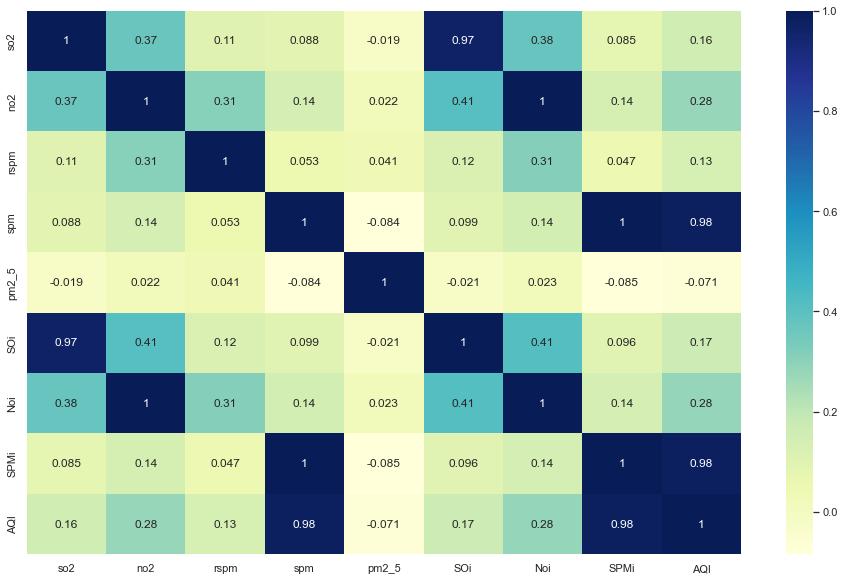

In [125]:
# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# annot: prints the correlation values in the chart
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")  #YlGnBu - YellowGreenBlue
# to show the plot
plt.show()

In [126]:
X=df[['so2','no2','rspm','spm','pm2_5','SOi','Noi','SPMi']]
Y=df['AQI']
X.head()

,so2,no2,rspm,spm,pm2_5,SOi,Noi,SPMi
0,4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0
1,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0
2,6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0
3,6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0
4,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0


In [127]:
Y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [128]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(338104, 8) (84526, 8) (338104,) (84526,)


<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">
Feature Scaling</span>

In [129]:
norm=MinMaxScaler()
norm.fit(X_train,Y_train)

MinMaxScaler()

In [130]:
X_train_scale=pd.DataFrame(data=norm.transform(X_train),columns=X_train.columns)
X_test_scale=pd.DataFrame(data=norm.transform(X_test),columns=X_test.columns)

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">
To bulid a model</span>

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">LINEAR REGRESSION</span>

In [131]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [132]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [134]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))
print('-'*50)
print('MSE',(mean_squared_error(Y_test,test_pred)))
print('-'*50)
print('MAE ',np.sqrt(mean_absolute_error(Y_test,test_pred)))
print('-'*50)
print('RMSE ',np.sqrt(mean_squared_error(Y_test,test_pred)))
print('-'*50)
print('R2_Score ',r2_score(Y_test,test_pred))
print('-'*50)
Adj_r2 = 1 - (1-r2_score(Y_test, test_pred)) * (len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adj_r2',Adj_r2)

RMSE TrainingData =  12.038810589745014
RMSE TestData =  12.067931173445295
--------------------------------------------------
RSquared value on train: 0.9838577840497992
RSquared value on test: 0.9836762588770496
--------------------------------------------------
MSE 145.63496280701276
--------------------------------------------------
MAE  2.8535792959654005
--------------------------------------------------
RMSE  12.067931173445295
--------------------------------------------------
R2_Score  0.9836762588770496
--------------------------------------------------
Adj_r2 0.983675949876955


In [135]:
# Adj_r2 = 1 - (1-r2_score(Y_test, test_pred)) * (len(Y)-1)/(len(Y)-X.shape[1]-1)
# Adj_r2

In [136]:
Acc_Score_train_lin_model=model.score(X_train,Y_train)
Acc_Score_test_lin_model=model.score(X_test,Y_test)

In [137]:
print("Accuracy of LinearRegression_Train:",Acc_Score_train_lin_model)
print("Accuracy of Linearregression_Test:",Acc_Score_test_lin_model)

Accuracy of LinearRegression_Train: 0.9838577840497992
Accuracy of Linearregression_Test: 0.9836762588770496


<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">DECISION TREE REGRESSOR</span>

In [138]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [139]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [141]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))
print('-'*50)
print('MSE',(mean_squared_error(Y_test,test_preds)))
print('-'*50)
print('MAE ',np.sqrt(mean_absolute_error(Y_test,test_preds)))
print('-'*50)
print('RMSE ',np.sqrt(mean_squared_error(Y_test,test_preds)))
print('-'*50)
print('R2_Score ',r2_score(Y_test,test_preds))
print('-'*50)
Adj_r2 = 1 - (1-r2_score(Y_test, test_preds)) * (len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adj_r2',Adj_r2)

RMSE TrainingData =  2.264101069734955e-13
RMSE TestData =  1.3631395127619748
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9997917261894635
--------------------------------------------------
MSE 1.8581493312529538
--------------------------------------------------
MAE  0.20366678354786177
--------------------------------------------------
RMSE  1.3631395127619748
--------------------------------------------------
R2_Score  0.9997917261894635
--------------------------------------------------
Adj_r2 0.9997917222469466


In [142]:
Acc_Score_train_DT=DT.score(X_train,Y_train)
Acc_Score_test_DT=DT.score(X_test,Y_test)

In [143]:
print("Accuracy of DecisionTree_Train:",Acc_Score_train_DT)
print("Accuracy of DecisionTree_Test:",Acc_Score_test_DT)

Accuracy of DecisionTree_Train: 1.0
Accuracy of DecisionTree_Test: 0.9997917261894635


<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">RANDOM FOREST REGRESSOR</span>

In [144]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [145]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [152]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))
print('-'*50)
print('MSE',(mean_squared_error(Y_test,test_preds1)))
print('-'*50)
print('MAE ',np.sqrt(mean_absolute_error(Y_test,test_preds1)))
print('-'*50)
print('RMSE ',np.sqrt(mean_squared_error(Y_test,test_preds1)))
print('-'*50)
print('R2_Score ',r2_score(Y_test,test_preds1))
print('-'*50)
Adj_r2 = 1 - (1-r2_score(Y_test, test_preds1)) * (len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adj_r2',Adj_r2)

RMSE TrainingData =  0.44558723104569115
RMSE TestData =  1.0359315111986445
--------------------------------------------------
RSquared value on train: 0.9999778862974437
RSquared value on test: 0.9998797137081044
--------------------------------------------------
MSE 1.073154095894307
--------------------------------------------------
MAE  0.2159709740129452
--------------------------------------------------
RMSE  1.0359315111986445
--------------------------------------------------
R2_Score  0.9998797137081044
--------------------------------------------------
Adj_r2 0.9998797114311462


In [153]:
Acc_Score_train_RF=RF.score(X_train,Y_train)
Acc_Score_test_RF=RF.score(X_test,Y_test)

In [154]:
print("Accuracy of RandomForest_Train:",Acc_Score_train_RF)
print("Accuracy of RandomForest_Test:",Acc_Score_test_RF)

Accuracy of RandomForest_Train: 0.9999778862974437
Accuracy of RandomForest_Test: 0.9998797137081044


<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">XGBOOST REGRESSOR</span>

In [155]:
from xgboost import XGBRegressor
XGB=XGBRegressor()
XGB.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [156]:
#predicting train
train_preds2=XGB.predict(X_train)
#predicting on test
test_preds2=XGB.predict(X_test)

In [157]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds2)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds2)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',XGB.score(X_train, Y_train))
print('RSquared value on test:',XGB.score(X_test, Y_test))
print('-'*50)
print('MSE',(mean_squared_error(Y_test,test_preds2)))
print('-'*50)
print('MAE ',np.sqrt(mean_absolute_error(Y_test,test_preds2)))
print('-'*50)
print('RMSE ',np.sqrt(mean_squared_error(Y_test,test_preds2)))
print('-'*50)
print('R2_Score ',r2_score(Y_test,test_preds2))
print('-'*50)
Adj_r2 = 1 - (1-r2_score(Y_test, test_preds2)) * (len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adj_r2',Adj_r2)

RMSE TrainingData =  1.0764112757488502
RMSE TestData =  1.350338014074128
--------------------------------------------------
RSquared value on train: 0.9998709516468323
RSquared value on test: 0.9997956196976716
--------------------------------------------------
MSE 1.8234127522536598
--------------------------------------------------
MAE  0.6026434786713841
--------------------------------------------------
RMSE  1.350338014074128
--------------------------------------------------
R2_Score  0.9997956196976716
--------------------------------------------------
Adj_r2 0.9997956158288567


In [158]:
Acc_Score_train_XGB=XGB.score(X_train,Y_train)
Acc_Score_test_XGB=XGB.score(X_test,Y_test)

In [159]:
print("Accuracy of XBBoost_Train:",Acc_Score_train_XGB)
print("Accuracy of XGBoost_Test:",Acc_Score_test_XGB)

Accuracy of XBBoost_Train: 0.9998709516468323
Accuracy of XGBoost_Test: 0.9997956196976716


<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">ADABOOST REGRESSOR</span>

In [160]:
from sklearn.ensemble import AdaBoostRegressor
ADA= AdaBoostRegressor()
ADA.fit(X_train,Y_train)

AdaBoostRegressor()

In [161]:
#predicting train
train_preds3=ADA.predict(X_train)
#predicting on test
test_preds3=ADA.predict(X_test)

In [162]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds3)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds3)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',ADA.score(X_train, Y_train))
print('RSquared value on test:',ADA.score(X_test, Y_test))
print('-'*50)
print('MSE',(mean_squared_error(Y_test,test_preds3)))
print('-'*50)
print('MAE ',np.sqrt(mean_absolute_error(Y_test,test_preds3)))
print('-'*50)
print('RMSE ',np.sqrt(mean_squared_error(Y_test,test_preds3)))
print('-'*50)
print('R2_Score ',r2_score(Y_test,test_preds3))
print('-'*50)
Adj_r2 = 1 - (1-r2_score(Y_test, test_preds3)) * (len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adj_r2',Adj_r2)

RMSE TrainingData =  30.36051983374935
RMSE TestData =  30.3717620082629
--------------------------------------------------
RSquared value on train: 0.8973368947242696
RSquared value on test: 0.8966063122309307
--------------------------------------------------
MSE 922.4439274865616
--------------------------------------------------
MAE  5.129189805106246
--------------------------------------------------
RMSE  30.3717620082629
--------------------------------------------------
R2_Score  0.8966063122309307
--------------------------------------------------
Adj_r2 0.8966043550411503


In [163]:
Acc_Score_train_ADA=ADA.score(X_train,Y_train)
Acc_Score_test_ADA=ADA.score(X_test,Y_test)

In [164]:
print("Accuracy of AdaBoost_Train:",Acc_Score_train_ADA)
print("Accuracy of AdaBoost_Test:",Acc_Score_test_ADA)

Accuracy of AdaBoost_Train: 0.8973368947242696
Accuracy of AdaBoost_Test: 0.8966063122309307


<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">GRADIENT BOOSTING REGRESSOR</span>

In [165]:
from sklearn.ensemble import GradientBoostingRegressor
GBR= GradientBoostingRegressor()
GBR.fit(X_train, Y_train)

GradientBoostingRegressor()

In [166]:
#predicting train
train_preds4=GBR.predict(X_train)
#predicting on test
test_preds4=GBR.predict(X_test)

In [167]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds4)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds4)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',GBR.score(X_train, Y_train))
print('RSquared value on test:',GBR.score(X_test, Y_test))
print('-'*50)
print('MSE',(mean_squared_error(Y_test,test_preds4)))
print('-'*50)
print('MAE ',np.sqrt(mean_absolute_error(Y_test,test_preds4)))
print('-'*50)
print('RMSE ',np.sqrt(mean_squared_error(Y_test,test_preds4)))
print('-'*50)
print('R2_Score ',r2_score(Y_test,test_preds4))
print('-'*50)
Adj_r2 = 1 - (1-r2_score(Y_test, test_preds4)) * (len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adj_r2',Adj_r2)

RMSE TrainingData =  2.3193242957832014
RMSE TestData =  2.3837572778470952
--------------------------------------------------
RSquared value on train: 0.999400872927143
RSquared value on test: 0.99936308993288
--------------------------------------------------
MSE 5.682298759688993
--------------------------------------------------
MAE  0.9585351293743759
--------------------------------------------------
RMSE  2.3837572778470952
--------------------------------------------------
R2_Score  0.99936308993288
--------------------------------------------------
Adj_r2 0.9993630778764973


In [168]:
Acc_Score_train_GBR=GBR.score(X_train,Y_train)
Acc_Score_test_GBR=GBR.score(X_test,Y_test)

In [169]:
print("Accuracy of GradientBoostingRegressor_Train:",Acc_Score_train_GBR)
print("Accuracy of GradientBoostingRegressor_Test:",Acc_Score_test_GBR)

Accuracy of GradientBoostingRegressor_Train: 0.999400872927143
Accuracy of GradientBoostingRegressor_Test: 0.99936308993288


<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">LASSO REGRESSION</span>

In [170]:
from sklearn.linear_model import Lasso, LassoCV
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(X_train, Y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [171]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.00015970226830315452)

In [172]:
#Lassocv
#predicting train
train_preds5=lassocv.predict(X_train)
#predicting on test
test_preds5=lassocv.predict(X_test)

In [173]:
#Lasso
#predicting train
train_preds6=lasso.predict(X_train)
#predicting on test
test_preds6=lasso.predict(X_test)

In [174]:
#Lassocv
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds5)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds5)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',lassocv.score(X_train, Y_train))
print('RSquared value on test:',lassocv.score(X_test, Y_test))
print('-'*50)
print('MSE',(mean_squared_error(Y_test,test_preds5)))
print('-'*50)
print('MAE ',np.sqrt(mean_absolute_error(Y_test,test_preds5)))
print('-'*50)
print('RMSE ',np.sqrt(mean_squared_error(Y_test,test_preds5)))
print('-'*50)
print('R2_Score ',r2_score(Y_test,test_preds5))
print('-'*50)
Adj_r2 = 1 - (1-r2_score(Y_test, test_preds5)) * (len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adj_r2',Adj_r2)

RMSE TrainingData =  12.092856051786484
RMSE TestData =  12.114689797245369
--------------------------------------------------
RSquared value on train: 0.9837125252200384
RSquared value on test: 0.9835495172906042
--------------------------------------------------
MSE 146.76570888348104
--------------------------------------------------
MAE  2.847524280196155
--------------------------------------------------
RMSE  12.114689797245369
--------------------------------------------------
R2_Score  0.9835495172906042
--------------------------------------------------
Adj_r2 0.9835492058913561


In [175]:
#Lasso
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds6)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds6)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',lasso.score(X_train, Y_train))
print('RSquared value on test:',lasso.score(X_test, Y_test))
print('-'*50)
print('MSE',(mean_squared_error(Y_test,test_preds6)))
print('-'*50)
print('MAE ',np.sqrt(mean_absolute_error(Y_test,test_preds6)))
print('-'*50)
print('RMSE ',np.sqrt(mean_squared_error(Y_test,test_preds6)))
print('-'*50)
print('R2_Score ',r2_score(Y_test,test_preds6))
print('-'*50)
Adj_r2 = 1 - (1-r2_score(Y_test, test_preds5)) * (len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adj_r2',Adj_r2)

RMSE TrainingData =  12.03953656504537
RMSE TestData =  12.06756078728687
--------------------------------------------------
RSquared value on train: 0.9838558371459376
RSquared value on test: 0.9836772608706632
--------------------------------------------------
MSE 145.62602335486372
--------------------------------------------------
MAE  2.8518848251550204
--------------------------------------------------
RMSE  12.06756078728687
--------------------------------------------------
R2_Score  0.9836772608706632
--------------------------------------------------
Adj_r2 0.9835492058913561


In [176]:
#Lassocv
Acc_Score_train_lassocv=lassocv.score(X_train,Y_train)
Acc_Score_test_lassocv=lassocv.score(X_test,Y_test)

In [177]:
print("Accuracy of Lassocv_Train:",Acc_Score_train_lassocv)
print("Accuracy of Lassocv_Test:",Acc_Score_test_lassocv)

Accuracy of Lassocv_Train: 0.9837125252200384
Accuracy of Lassocv_Test: 0.9835495172906042


In [178]:
#Lasso
Acc_Score_train_lasso=lasso.score(X_train,Y_train)
Acc_Score_test_lasso=lasso.score(X_test,Y_test)

In [179]:
print("Accuracy of Lasso_Train:",Acc_Score_train_lasso)
print("Accuracy of Lasso_Test:",Acc_Score_test_lasso)

Accuracy of Lasso_Train: 0.9838558371459376
Accuracy of Lasso_Test: 0.9836772608706632


<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 22px">DATA FRAME WITH VISUALIZATION GRAPH FOR REGRESSION MODEL</span>

In [180]:
models = pd.DataFrame({
     'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest','XGBoost','Ada Boost', 'Gradient Boost', 'Lassocv Regression','Lasso Regression'],
     'Score_Train' : [model.score(X_train,Y_train),DT.score(X_train,Y_train),RF.score(X_train,Y_train),XGB.score(X_train,Y_train),
             ADA.score(X_train,Y_train),GBR.score(X_train,Y_train),lasso.score(X_train,Y_train),lassocv.score(X_train,Y_train),]})

models.sort_values(by = 'Score_Train', ascending = False)

,Model,Score_Train
1,Decision Tree,1.000000
2,Random Forest,0.999978
3,XGBoost,0.999871
5,Gradient Boost,0.999401
0,Linear Regression,0.983858
6,Lassocv Regression,0.983856
7,Lasso Regression,0.983713
4,Ada Boost,0.897337


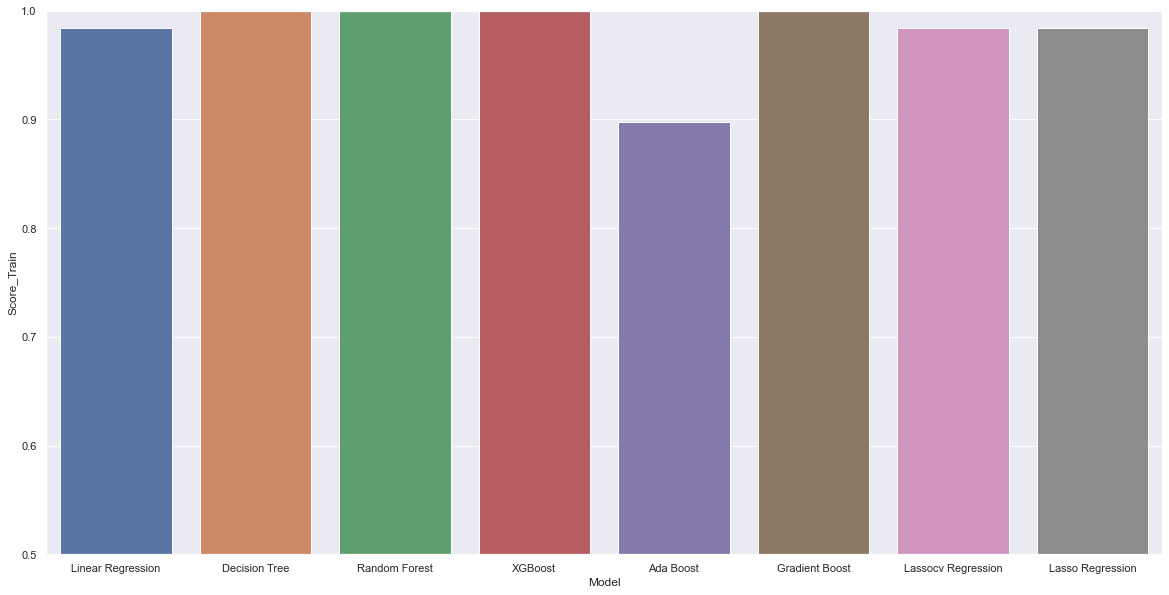

In [181]:
plt.figure(figsize = (20, 10))

sns.barplot(x = 'Model', y = 'Score_Train', data = models)
plt.ylim(0.50, 1)
plt.show()

In [182]:
models1 = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest','XGBoost','Ada Boost', 'Gradient Boost', 'Lassocv Regression','Lasso Regression'],
    'Score_Test' : [model.score(X_test,Y_test),DT.score(X_test,Y_test),RF.score(X_test,Y_test),XGB.score(X_test,Y_test),ADA.score(X_test,Y_test),   
               GBR.score(X_test,Y_test),lasso.score(X_test,Y_test),lassocv.score(X_test,Y_test), ]})


models1.sort_values(by = 'Score_Test', ascending = False)

,Model,Score_Test
2,Random Forest,0.999880
3,XGBoost,0.999796
1,Decision Tree,0.999792
5,Gradient Boost,0.999363
6,Lassocv Regression,0.983677
0,Linear Regression,0.983676
7,Lasso Regression,0.983550
4,Ada Boost,0.896606


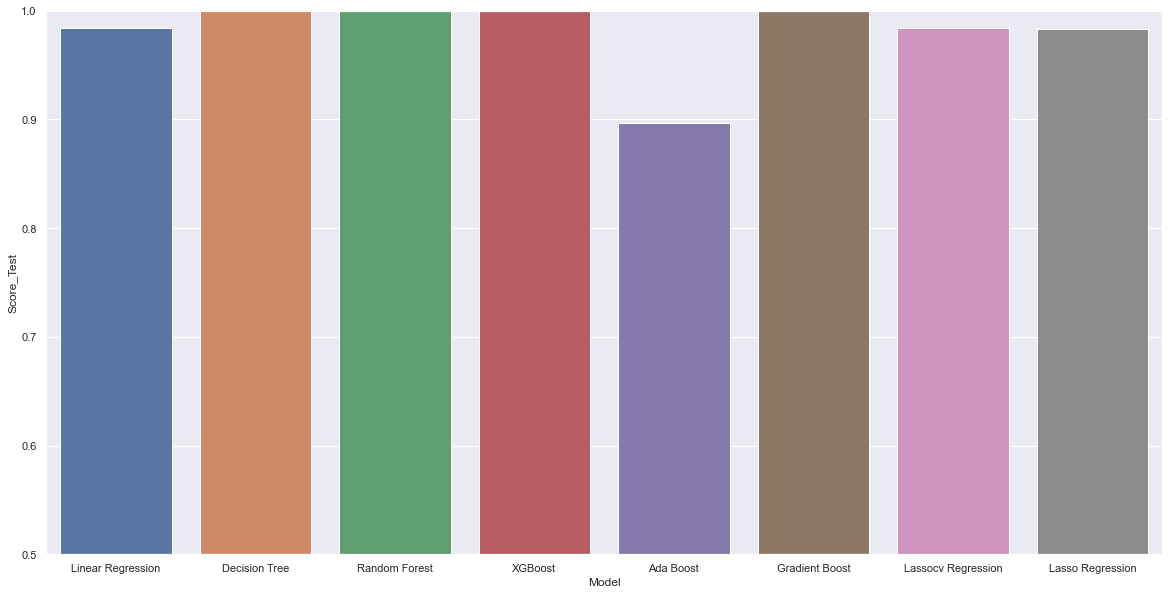

In [183]:
plt.figure(figsize = (20, 10))

sns.barplot(x = 'Model', y = 'Score_Test', data = models1)
plt.ylim(0.50, 1)
plt.show()

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 22px">CONCLUSION FOR REGRESSION</span>

<h3 style='font-weight:bold'>
    <li>The supervised Regression learning algorithms named in the above result have been implemented on the given dataset. The performance of the models was evaluated using the RMSE, RSquared, MSE, MAE, and R2_Score with Range of AQI Features.</li><br>
    <li>The above table shows that the Decision Tree has the highest value but Random Forest better performance measures like RMSE, RSquared, MSE, MAE, and R2_Score. Therefore, it can be concluded that the Random Forest gives a better  performance comparing with other all model and score can be used to predict the existence of AQI.</li></h3>

<span style="background-color:#2384ad;color:black;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">CLASSIFICATION ALGORITHMS</span>

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">LOGISTIC REGRESSION</span>

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.model_selection import GridSearchCV

In [186]:
# Splitting the data into independent and dependent columns for classification 
X2 = df[['so2','no2','rspm','spm','pm2_5','SOi','Noi','SPMi']]
Y2 = df['AQI_Range']

In [187]:
# Splitting the data into training and testing data 
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.35, random_state=70)

In [188]:
log_reg = LogisticRegression()
#log_reg.fit(X_train2, Y_train2)
params_grid={ 'penalty':['l1','l2','elasticnet'],
    'solver':['newton-cg','lbfgs','liblinear', 'sag', 'saga']
           }
log_regr= GridSearchCV(log_reg,params_grid)
log_regr.fit(X_train2,Y_train2)


model_log_reg=LogisticRegression(**log_regr.best_params_)
model_log_reg.fit(X_train2,Y_train2)
log_reg.fit(X_train2,Y_train2)

#predict on train 
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ",accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))
print(f"Confusion Matrix :- \n{confusion_matrix(Y_test2, log_reg.predict(X_test2))}\n")
print('-'*50)
print(f"Classification Report :- \n {classification_report(Y_test2, log_reg.predict(X_test2))}")


Model accuracy on train is:  0.7398119464597083
Model accuracy on test is:  0.7398408610001285
--------------------------------------------------
KappaScore is:  0.6003832047458763
Confusion Matrix :- 
[[72865   195  2553  1432     0    17]
 [    0   259     0   500     0  1135]
 [ 7743   691 10815   361     0    49]
 [  669  2190  2393 16887  7515  2985]
 [   16     0    18  5086  5980    67]
 [    0   632     1  2235     0  2632]]

--------------------------------------------------
Classification Report :- 
                 precision    recall  f1-score   support

          Good       0.90      0.95      0.92     77062
     Hazardous       0.07      0.14      0.09      1894
      Moderate       0.69      0.55      0.61     19659
          Poor       0.64      0.52      0.57     32639
     Unhealthy       0.44      0.54      0.48     11167
Very unhealthy       0.38      0.48      0.43      5500

      accuracy                           0.74    147921
     macro avg       0.52      0.5

In [189]:
log_reg.predict([[727,327.55,78.2,100,82.0,36.0,218.0,13.75]]) 

array(['Poor'], dtype=object)

In [190]:
log_reg.predict([[2.7,45,35.16,23,95.0,224.0,80.0,97.0]]) 

array(['Moderate'], dtype=object)

In [191]:
log_reg.predict([[28.3,11.1,23.2,35.62,10.8,71.0,188.0,21.37]]) 

array(['Good'], dtype=object)

In [192]:
log_reg.predict([[116.0,100.6,144.0,100.0,169,242.0,135.3,264.0]]) 

array(['Moderate'], dtype=object)

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">DECISION TREE CLASSIFIER</span>

In [193]:
from sklearn.tree import DecisionTreeClassifier
DT2 = DecisionTreeClassifier()
params_grid={'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[2,4,6],
    'min_samples_split':[2,3,4]
           }
DTC= GridSearchCV(DT2,params_grid)
DTC.fit(X_train2,Y_train2)


model_DTC=DecisionTreeClassifier(**DTC.best_params_)
model_DTC.fit(X_train2,Y_train2)
DT2.fit(X_train2,Y_train2)

#predict on train 
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))
print(f"Confusion Matrix :- \n{confusion_matrix(Y_test2,DT2.predict(X_test2))}\n")
print('-'*50)
print(f"Classification Report :- \n {classification_report(Y_test2,DT2.predict(X_test2))}")

Model accuracy on train is:  1.0
Model accuracy on test is:  0.999763387213445
--------------------------------------------------
KappaScore is:  0.999638751555536
Confusion Matrix :- 
[[77047     0    15     0     0     0]
 [    0  1894     0     0     0     0]
 [   19     0 19639     1     0     0]
 [    0     0     0 32639     0     0]
 [    0     0     0     0 11167     0]
 [    0     0     0     0     0  5500]]

--------------------------------------------------
Classification Report :- 
                 precision    recall  f1-score   support

          Good       1.00      1.00      1.00     77062
     Hazardous       1.00      1.00      1.00      1894
      Moderate       1.00      1.00      1.00     19659
          Poor       1.00      1.00      1.00     32639
     Unhealthy       1.00      1.00      1.00     11167
Very unhealthy       1.00      1.00      1.00      5500

      accuracy                           1.00    147921
     macro avg       1.00      1.00      1.00    14

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">RANDOM FOREST CLASSIFIER</span>

In [316]:
from sklearn.ensemble import RandomForestClassifier 
RF2=RandomForestClassifier()
params_grid={ 'n_estimators':[100],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[2,4,6],
    'min_samples_split':[2,3,4]
           }
RFC= GridSearchCV(RF2,params_grid)
RFC.fit(X_train2,Y_train2)


model_RFC=RandomForestClassifier(**RFC.best_params_)
model_RFC.fit(X_train2,Y_train2)
RF2.fit(X_train2,Y_train2)

#predict on train 
train_preds4 = RF2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))
print(f"Confusion Matrix :- \n{confusion_matrix(Y_test2,RF2.predict(X_test2))}\n")
print('-'*50)
print(f"Classification Report :- \n {classification_report(Y_test2,RF2.predict(X_test2))}")

Model accuracy on train is:  1.0
Model accuracy on test is:  0.999810709770756
--------------------------------------------------
KappaScore is:  0.9997110177310178
Confusion Matrix :- 
[[77046     0    16     0     0     0]
 [    0  1893     0     0     0     1]
 [    4     0 19654     1     0     0]
 [    0     0     0 32639     0     0]
 [    0     0     0     4 11163     0]
 [    0     0     0     0     2  5498]]

--------------------------------------------------
Classification Report :- 
                 precision    recall  f1-score   support

          Good       1.00      1.00      1.00     77062
     Hazardous       1.00      1.00      1.00      1894
      Moderate       1.00      1.00      1.00     19659
          Poor       1.00      1.00      1.00     32639
     Unhealthy       1.00      1.00      1.00     11167
Very unhealthy       1.00      1.00      1.00      5500

      accuracy                           1.00    147921
     macro avg       1.00      1.00      1.00    1

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">KNN-CLASSIFIER</span>

In [318]:
from sklearn.neighbors import KNeighborsClassifier
KNN2 = KNeighborsClassifier()
params_grid={'n_neighbors':[5,7],
    'weights':['uniform','distance'],
    'algorithm':['ball_tree','kd_tree']
           }
clf = GridSearchCV(KNN2,params_grid)
clf.fit(X_train2,Y_train2)


model_knn=KNeighborsClassifier(**clf.best_params_)
model_knn.fit(X_train2,Y_train2)
KNN2.fit(X_train2,Y_train2)
#predict on train 
train_preds5 = KNN2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))
print(f"Confusion Matrix :- \n{confusion_matrix(Y_test2,KNN2.predict(X_test2))}\n")
print('-'*50)
print(f"Classification Report :- \n {classification_report(Y_test2,KNN2.predict(X_test2))}")

Model accuracy on train is:  0.9960758475332079
Model accuracy on test is:  0.9924892341182118
--------------------------------------------------
KappaScore is:  0.9885306382843999
Confusion Matrix :- 
[[76845     0   217     0     0     0]
 [    0  1857     0     0     0    37]
 [  238     0 19298   123     0     0]
 [    2     0   114 32468    55     0]
 [    0     0     0   130 11002    35]
 [    0    80     0     0    80  5340]]

--------------------------------------------------
Classification Report :- 
                 precision    recall  f1-score   support

          Good       1.00      1.00      1.00     77062
     Hazardous       0.96      0.98      0.97      1894
      Moderate       0.98      0.98      0.98     19659
          Poor       0.99      0.99      0.99     32639
     Unhealthy       0.99      0.99      0.99     11167
Very unhealthy       0.99      0.97      0.98      5500

      accuracy                           0.99    147921
     macro avg       0.98      0.9

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">GRADIENT BOOSTING CLASSIFIER</span>

In [319]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
params_grid={'loss':['log_loss','deviance','exponential'],
    'n_estimators':[100],
    'criterion':['friedman_mse', 'squared_error', 'mse']
           }
Grbc= GridSearchCV(GBC,params_grid)
Grbc.fit(X_train2,Y_train2)


model_GBC=GradientBoostingClassifier(**Grbc.best_params_)
model_GBC.fit(X_train2,Y_train2)
GBC.fit(X_train2,Y_train2)

#predict on train 
train_preds6=GBC.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds6))

#predict on test
test_preds6=GBC.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds6))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds6))
print(f"Confusion Matrix :- \n{confusion_matrix(Y_test2,GBC.predict(X_test2))}\n")
print('-'*50)
print(f"Classification Report :- \n {classification_report(Y_test2,GBC.predict(X_test2))}")

Model accuracy on train is:  0.9999199152557797
Model accuracy on test is:  0.9998242305014163
--------------------------------------------------
KappaScore is:  0.9997316700499704
Confusion Matrix :- 
[[77039     0    23     0     0     0]
 [    0  1894     0     0     0     0]
 [    3     0 19656     0     0     0]
 [    0     0     0 32639     0     0]
 [    0     0     0     0 11167     0]
 [    0     0     0     0     0  5500]]

--------------------------------------------------
Classification Report :- 
                 precision    recall  f1-score   support

          Good       1.00      1.00      1.00     77062
     Hazardous       1.00      1.00      1.00      1894
      Moderate       1.00      1.00      1.00     19659
          Poor       1.00      1.00      1.00     32639
     Unhealthy       1.00      1.00      1.00     11167
Very unhealthy       1.00      1.00      1.00      5500

      accuracy                           1.00    147921
     macro avg       1.00      1.0

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">NAIVE BAYES CLASSIFIER</span>

In [320]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
params_grid={'priors':['n_classes,'],
    'var_smoothing':[1e-9],
           }
Gnb= GridSearchCV(NB,params_grid)
Gnb.fit(X_train2,Y_train2)


model_Gnb=GaussianNB(**Gnb.best_params_)
model_Gnb.fit(X_train2,Y_train2)
NB.fit(X_train2,Y_train2)
#predict on train 
train_preds7=NB.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds7))

#predict on test
test_preds7=NB.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds7))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds7))
print(f"Confusion Matrix :- \n{confusion_matrix(Y_test2,NB.predict(X_test2))}\n")
print('-'*50)
print(f"Classification Report :- \n {classification_report(Y_test2,NB.predict(X_test2))}")

Model accuracy on train is:  0.839910596303725
Model accuracy on test is:  0.841144935472313
--------------------------------------------------
KappaScore is:  0.7612459546276296
Confusion Matrix :- 
[[72485     0  4577     0     0     0]
 [    0  1882     0     0     0    12]
 [ 2750     0 11068  5841     0     0]
 [    0     0  1160 23034  8443     2]
 [    0     0    43    23 10889   212]
 [    0   359     1     4    71  5065]]

--------------------------------------------------
Classification Report :- 
                 precision    recall  f1-score   support

          Good       0.96      0.94      0.95     77062
     Hazardous       0.84      0.99      0.91      1894
      Moderate       0.66      0.56      0.61     19659
          Poor       0.80      0.71      0.75     32639
     Unhealthy       0.56      0.98      0.71     11167
Very unhealthy       0.96      0.92      0.94      5500

      accuracy                           0.84    147921
     macro avg       0.80      0.85 

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 20px">SUPPORT VECTOR CLASSIFIER</span>

In [321]:
from sklearn.svm import SVC
svc=SVC()
params_grid={'C':[1.0],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'degree':[3]
           }
svc1= GridSearchCV(svc,params_grid)
svc1.fit(X_train2,Y_train2)


model_svc=SVC(**svc1.best_params_)
model_svc.fit(X_train2,Y_train2)
svc.fit(X_train2,Y_train2)
#predict on train 
train_preds8=svc.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds8))

#predict on test
test_preds8=svc.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds8))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds8))
print(f"Confusion Matrix :- \n{confusion_matrix(Y_test2,svc.predict(X_test2))}\n")
print('-'*50)
print(f"Classification Report :- \n {classification_report(Y_test2,svc.predict(X_test2))}")


Model accuracy on train is:  0.9939608822426641
Model accuracy on test is:  0.9936655376856566
--------------------------------------------------
KappaScore is:  0.9903217898617975
Confusion Matrix :- 
[[76827     0   232     3     0     0]
 [    0  1893     0     0     0     1]
 [  397     0 19171    91     0     0]
 [    2     0    66 32570     1     0]
 [    0     0     0    44 11123     0]
 [    0    57     0     0    43  5400]]

--------------------------------------------------
Classification Report :- 
                 precision    recall  f1-score   support

          Good       0.99      1.00      1.00     77062
     Hazardous       0.97      1.00      0.98      1894
      Moderate       0.98      0.98      0.98     19659
          Poor       1.00      1.00      1.00     32639
     Unhealthy       1.00      1.00      1.00     11167
Very unhealthy       1.00      0.98      0.99      5500

      accuracy                           0.99    147921
     macro avg       0.99      0.9

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 22px">DATA FRAME WITH VISUALIZATION GRAPH FOR CLASSIFICATION MODEL</span>

In [322]:
models2= pd.DataFrame({
    'Model' : ['Logistic Regression','Decision Tree Classifier','Random Forest classifier','K-nearestneigbour','Gradient Boost Classifier','Naviebayes','Support Vector classifier'],
    'Score_Train' : [accuracy_score(Y_train2,train_preds2),accuracy_score(Y_train2,train_preds3),accuracy_score(Y_train2,train_preds4),
                     accuracy_score(Y_train2,train_preds5),accuracy_score(Y_train2,train_preds6),accuracy_score(Y_train2,train_preds7),
                     accuracy_score(Y_train2,train_preds8)]})


models2.sort_values(by = 'Score_Train', ascending = False)

,Model,Score_Train
1,Decision Tree Classifier,1.000000
2,Random Forest classifier,1.000000
4,Gradient Boost Classifier,0.999920
3,K-nearestneigbour,0.996076
6,Support Vector classifier,0.993961
5,Naviebayes,0.839911
0,Logistic Regression,0.739812


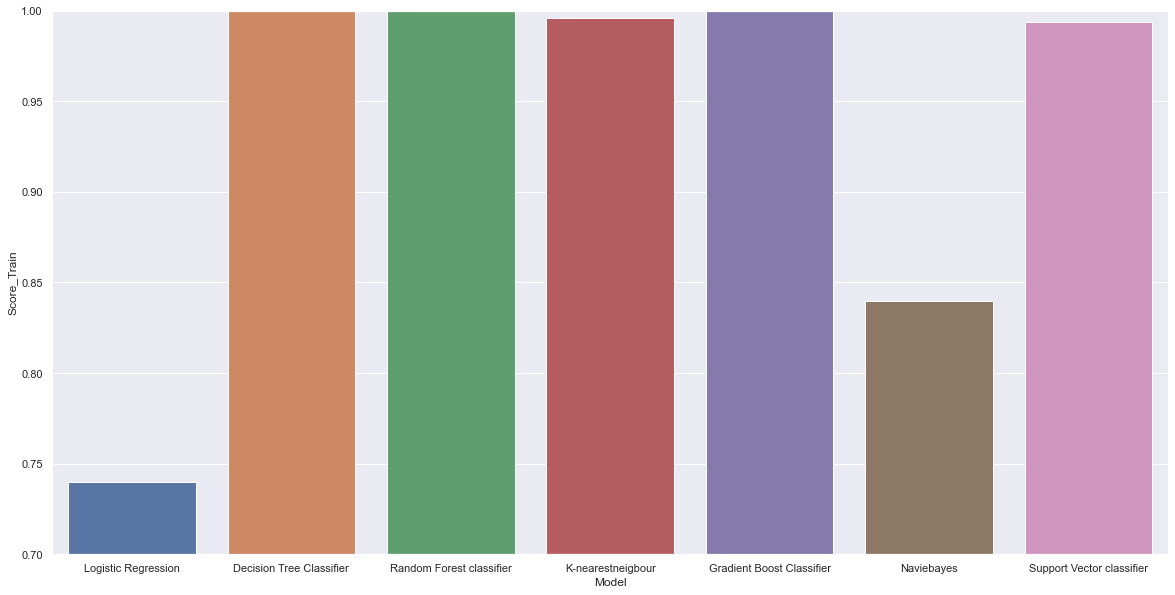

In [323]:
plt.figure(figsize = (20, 10))

sns.barplot(x = 'Model', y = 'Score_Train', data = models2)
plt.ylim(0.70, 1)
plt.show()

In [324]:
models3= pd.DataFrame({
    'Model' : ['Logistic Regression','Decision Tree Classifier','Random Forest classifier','K-nearestneigbour','Gradient Boost Classifier','Naviebayes','Support Vector Classifier'],
    'Score_Test' : [accuracy_score(Y_test2,test_preds2),accuracy_score(Y_test2,test_preds3),accuracy_score(Y_test2,test_preds4),
                     accuracy_score(Y_test2,test_preds5),accuracy_score(Y_test2,test_preds6),accuracy_score(Y_test2,test_preds7),
                   accuracy_score(Y_test2,test_preds8)]})


models3.sort_values(by = 'Score_Test', ascending = False)

,Model,Score_Test
4,Gradient Boost Classifier,0.999824
2,Random Forest classifier,0.999811
1,Decision Tree Classifier,0.999743
6,Support Vector Classifier,0.993666
3,K-nearestneigbour,0.992489
5,Naviebayes,0.841145
0,Logistic Regression,0.739841


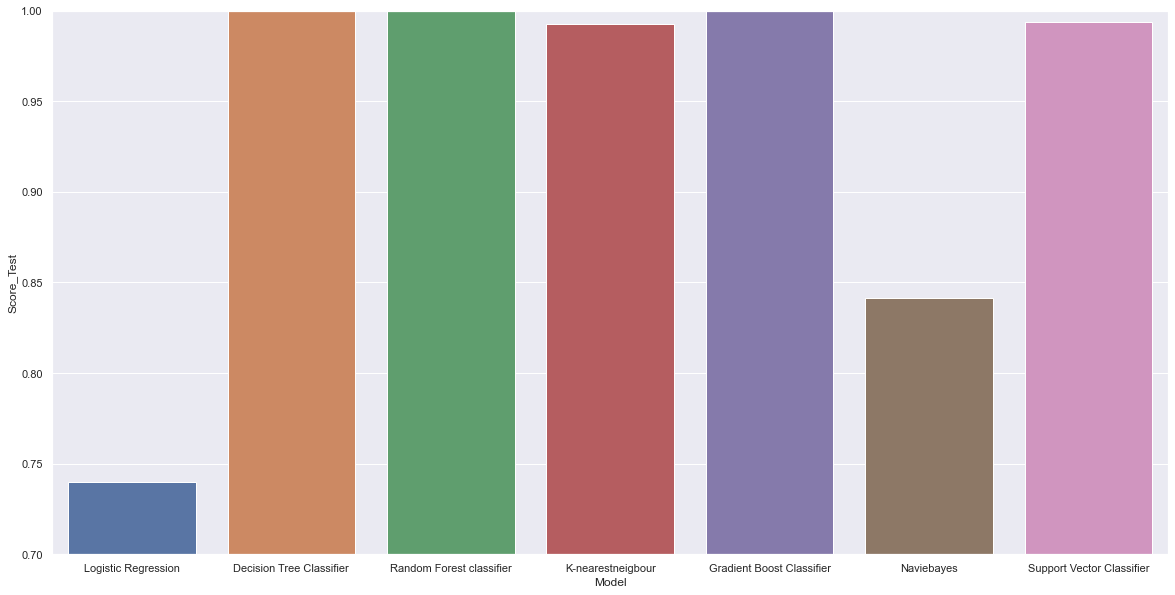

In [325]:
plt.figure(figsize = (20, 10))

sns.barplot(x = 'Model', y = 'Score_Test', data = models3)
plt.ylim(0.70, 1)
plt.show()

<AxesSubplot:xlabel='AQI_Range', ylabel='AQI'>

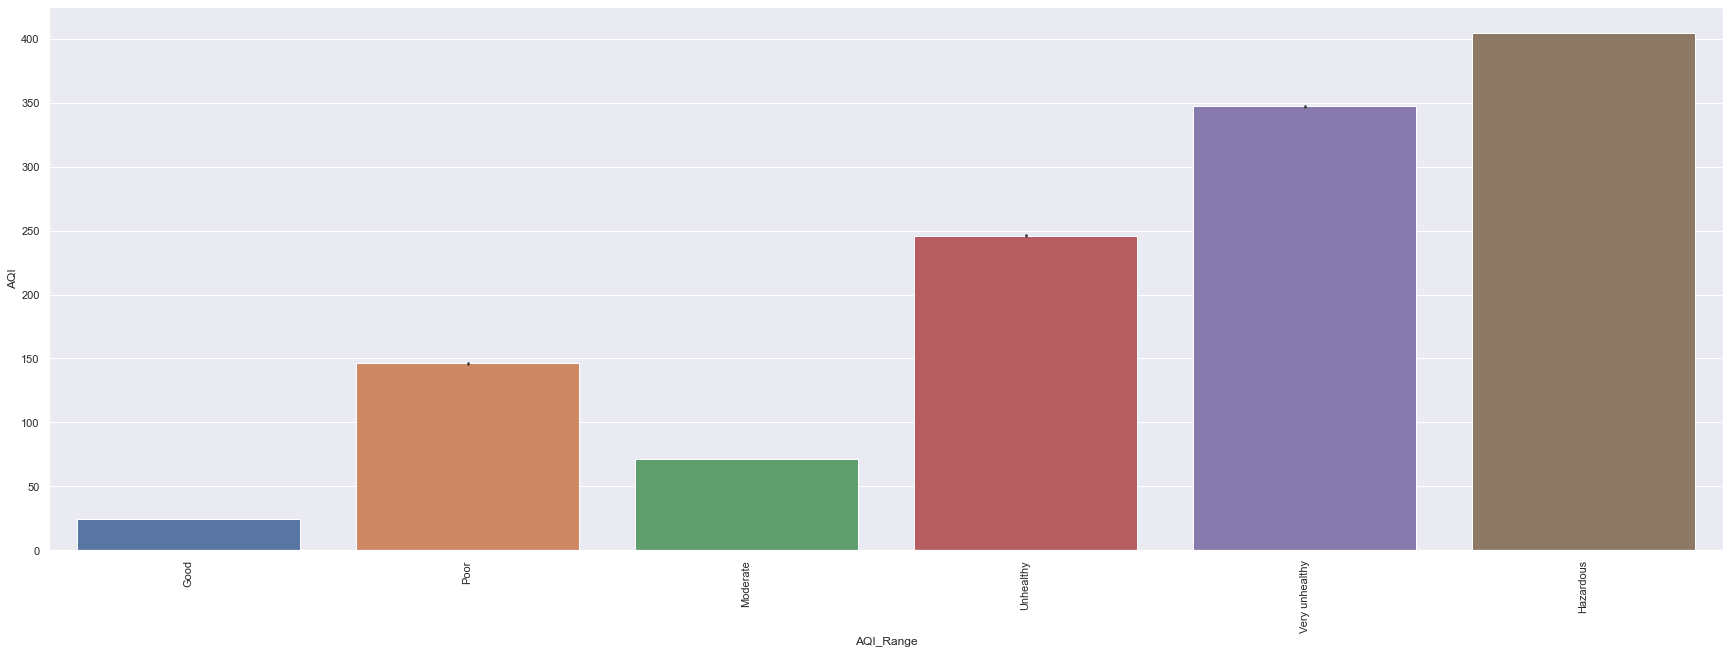

In [326]:
#Range of the AQI_RANGE to be polluted air- Major is HAZARDOUS
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='AQI_Range',y='AQI',data=df)

<span style="background-color:#2384ad;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #01090d;padding:0px 22px">CONCLUSION FOR CLASSIFICATION</span>

<h3 style='font-weight:bold'>
    <li>The supervised classification learning algorithms named in the above result have been implemented on the given dataset. The performance of the models was evaluated using the accuracy, precision, recall,f1-score and support with multi classification as Good, Moderate, Poor, Unhealty, Very unhealty and Hazardous.</li><br>
    <li>The above table shows that the Decision Tree and Random Forest as show has the highest values but Random Forest better performance measures like Precision, Recall, f1-score,Support and accuracy. Therefore, it can be concluded that the Random Forest gives a better performance when comparing with other model and accuracy can be used to predict the existence of AQI_Range in AQI.</li></h3>